# 2.3.1. Загрузка данных и первичный анализ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os
import pandas as pd


In [87]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

## Первый датасет

In [4]:
# Загружаем первый датасет
df1 = pd.read_csv('data/S07-hw-dataset-01.csv')

print(df1.head())

   sample_id        f01        f02       f03         f04        f05  \
0          0  -0.536647 -69.812900 -0.002657   71.743147 -11.396498   
1          1  15.230731  52.727216 -1.273634 -104.123302  11.589643   
2          2  18.542693  77.317150 -1.321686 -111.946636  10.254346   
3          3 -12.538905 -41.709458  0.146474   16.322124   1.391137   
4          4  -6.903056  61.833444 -0.022466  -42.631335   3.107154   

         f06        f07       f08  
0 -12.291287  -6.836847 -0.504094  
1  34.316967 -49.468873  0.390356  
2  25.892951  44.595250  0.325893  
3   2.014316 -39.930582  0.139297  
4  -5.471054   7.001149  0.131213  


In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03        12000 non-null  float64
 4   f04        12000 non-null  float64
 5   f05        12000 non-null  float64
 6   f06        12000 non-null  float64
 7   f07        12000 non-null  float64
 8   f08        12000 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB
None


In [6]:
# 3. Базовая статистика
print(df1.describe())

         sample_id           f01           f02           f03           f04  \
count  12000.00000  12000.000000  12000.000000  12000.000000  12000.000000   
mean    5999.50000     -2.424716     19.107804     -0.222063     -8.284501   
std     3464.24595     11.014315     60.790338      0.500630     59.269838   
min        0.00000    -19.912573    -92.892652     -1.590979   -134.303679   
25%     2999.75000     -9.472623    -40.282955     -0.125145    -48.345007   
50%     5999.50000     -6.869404     54.069335     -0.031753     16.211728   
75%     8999.25000      0.523841     70.280739      0.054980     28.067178   
max    11999.00000     24.403381    112.229523      0.512277     75.088604   

                f05           f06           f07           f08  
count  12000.000000  12000.000000  12000.000000  12000.000000  
mean      -0.190717      0.962972      0.033724      0.007638  
std        7.026435     14.794713     59.541782      0.607053  
min      -11.869169    -20.521164   -215.

In [7]:
# 4. Проверка пропусков
missing_data = df1.isnull().sum()
missing_percent = (df1.isnull().sum() / len(df1)) * 100

missing_df = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percent
})
print(missing_df[missing_df['Пропусков'] > 0])

Empty DataFrame
Columns: [Пропусков, Процент]
Index: []


In [8]:
# 5. Типы признаков
print(df1.dtypes)

sample_id      int64
f01          float64
f02          float64
f03          float64
f04          float64
f05          float64
f06          float64
f07          float64
f08          float64
dtype: object


In [9]:
# 6. Определяем X (признаки) и сохраняем sample_id
sample_id_1 = df1['sample_id']  # сохраняем идентификаторы
X1 = df1.drop('sample_id', axis=1)  # это наши признаки

print(f"sample_id сохранен отдельно, размер: {sample_id_1.shape}")
print(f"Признаки X1, размер: {X1.shape}")
print(f"Столбцы в X1: {list(X1.columns)}")

sample_id сохранен отдельно, размер: (12000,)
Признаки X1, размер: (12000, 8)
Столбцы в X1: ['f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08']


## Второй датасет

In [10]:
# Загружаем второй датасет
df2 = pd.read_csv('data/S07-hw-dataset-02.csv')

print(df2.head())

   sample_id        x1        x2    z_noise
0          0  0.098849 -1.846034  21.288122
1          1 -1.024516  1.829616   6.072952
2          2 -1.094178 -0.158545 -18.938342
3          3 -1.612808 -1.565844 -11.629462
4          4  1.659901 -2.133292   1.895472


In [11]:
# 2. Основная информация о данных
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None


In [12]:
# 3. Базовая статистика
print(df2.describe())

        sample_id           x1           x2      z_noise
count  8000.00000  8000.000000  8000.000000  8000.000000
mean   3999.50000     0.478867     0.241112     0.110454
std    2309.54541     0.955138     0.663195     8.097716
min       0.00000    -2.487352    -2.499237   -34.056074
25%    1999.75000    -0.116516    -0.242357    -5.392210
50%    3999.50000     0.490658     0.241092     0.132470
75%    5999.25000     1.085263     0.726526     5.655605
max    7999.00000     2.987555     2.995553    29.460076


In [13]:
# 4. Проверка пропусков
missing_data = df2.isnull().sum()
missing_percent = (df2.isnull().sum() / len(df2)) * 100

missing_df = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percent
})
print(missing_df[missing_df['Пропусков'] > 0])

Empty DataFrame
Columns: [Пропусков, Процент]
Index: []


In [14]:
# 5. Типы признаков
print(df2.dtypes)

sample_id      int64
x1           float64
x2           float64
z_noise      float64
dtype: object


In [15]:
# 6. Определяем X (признаки) и сохраняем sample_id
sample_id_2 = df2['sample_id']  # сохраняем идентификаторы
X2 = df2.drop('sample_id', axis=1)  # это наши признаки

print(f"sample_id сохранен отдельно, размер: {sample_id_2.shape}")
print(f"Признаки X2, размер: {X2.shape}")
print(f"Столбцы в X2: {list(X2.columns)}")

sample_id сохранен отдельно, размер: (8000,)
Признаки X2, размер: (8000, 3)
Столбцы в X2: ['x1', 'x2', 'z_noise']


## Датасет 3

In [16]:
# Загружаем второй датасет
df3 = pd.read_csv('data/S07-hw-dataset-04.csv')

print(df3.head())

   sample_id cat_a cat_b        n01        n02        n03        n04  \
0          0     B     X  -4.827501 -24.507466  -7.852963   0.771781   
1          1     F     V  51.302500        NaN   5.534737  51.305464   
2          2     A     W  -4.820828  -2.625385  27.891578   1.523041   
3          3     B     X  -2.627573 -25.063639  -9.450011  -8.344669   
4          4     C     Y -11.415710  -8.692169  48.636163  14.661826   

         n05        n06        n07  ...        n21        n22        n23  \
0  28.297884  -4.493911 -42.769449  ...  24.597176 -26.354320   4.543397   
1  -8.027553  28.297548        NaN  ... -18.216260   8.527932  17.202115   
2  -5.776687 -16.298523   2.462937  ... -48.260775   9.313232  12.323411   
3  22.371118 -11.525848 -43.762607  ...  24.700663 -25.466915  -3.398665   
4 -39.634618  10.769075  40.187536  ... -79.710383 -13.694253  41.575892   

         n24       n25       n26       n27       n28       n29       n30  
0 -19.549036 -3.051332 -5.538587 -3

In [17]:
# 2. Основная информация о данных
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  10000 non-null  int64  
 1   cat_a      10000 non-null  object 
 2   cat_b      10000 non-null  object 
 3   n01        9826 non-null   float64
 4   n02        9811 non-null   float64
 5   n03        9801 non-null   float64
 6   n04        9808 non-null   float64
 7   n05        9799 non-null   float64
 8   n06        9817 non-null   float64
 9   n07        9796 non-null   float64
 10  n08        9806 non-null   float64
 11  n09        9805 non-null   float64
 12  n10        9811 non-null   float64
 13  n11        9796 non-null   float64
 14  n12        9798 non-null   float64
 15  n13        9803 non-null   float64
 16  n14        9802 non-null   float64
 17  n15        9814 non-null   float64
 18  n16        9809 non-null   float64
 19  n17        9788 non-null   float64
 20  n18    

In [18]:
# 3. Базовая статистика
print(df3.describe())

         sample_id          n01          n02          n03          n04  \
count  10000.00000  9826.000000  9811.000000  9801.000000  9808.000000   
mean    4999.50000    17.348435    -2.057620     7.908302    14.269157   
std     2886.89568    22.578551    19.043410    25.637807    18.815319   
min        0.00000   -22.437090   -37.546998   -38.136412   -23.374316   
25%     2499.75000    -3.975438   -14.200552    -8.591513    -1.223379   
50%     4999.50000    22.042807    -6.532183     0.350400    10.069142   
75%     7499.25000    37.535647     2.092197    30.725630    29.807101   
max     9999.00000    65.446912    43.326647    60.185729    65.094588   

               n05          n06          n07          n08          n09  ...  \
count  9799.000000  9817.000000  9796.000000  9806.000000  9805.000000  ...   
mean      0.900590     5.832787    -0.840875    -4.888128     3.184200  ...   
std      20.981294    13.221646    26.583849    15.466271    32.208740  ...   
min     -45.91407

In [19]:
# 4. Проверка пропусков
missing_data = df3.isnull().sum()
missing_percent = (df3.isnull().sum() / len(df3)) * 100

missing_df = pd.DataFrame({
    'Пропусков': missing_data,
    'Процент': missing_percent
})
print(missing_df[missing_df['Пропусков'] > 0])

     Пропусков  Процент
n01        174     1.74
n02        189     1.89
n03        199     1.99
n04        192     1.92
n05        201     2.01
n06        183     1.83
n07        204     2.04
n08        194     1.94
n09        195     1.95
n10        189     1.89
n11        204     2.04
n12        202     2.02
n13        197     1.97
n14        198     1.98
n15        186     1.86
n16        191     1.91
n17        212     2.12
n18        212     2.12
n19        187     1.87
n20        203     2.03
n21        215     2.15
n22        196     1.96
n23        171     1.71
n24        207     2.07
n25        185     1.85
n26        224     2.24
n27        197     1.97
n28        211     2.11
n29        202     2.02
n30        195     1.95


In [20]:
# 5. Типы признаков
print(df3.dtypes)

sample_id      int64
cat_a         object
cat_b         object
n01          float64
n02          float64
n03          float64
n04          float64
n05          float64
n06          float64
n07          float64
n08          float64
n09          float64
n10          float64
n11          float64
n12          float64
n13          float64
n14          float64
n15          float64
n16          float64
n17          float64
n18          float64
n19          float64
n20          float64
n21          float64
n22          float64
n23          float64
n24          float64
n25          float64
n26          float64
n27          float64
n28          float64
n29          float64
n30          float64
dtype: object


In [21]:
# 6. Определяем X (признаки) и сохраняем sample_id
sample_id_2 = df3['sample_id']  # сохраняем идентификаторы
X3 = df3.drop('sample_id', axis=1)  # это наши признаки

print(f"sample_id сохранен отдельно, размер: {sample_id_2.shape}")
print(f"Признаки X3, размер: {X3.shape}")
print(f"Столбцы в X3: {list(X3.columns)}")

sample_id сохранен отдельно, размер: (10000,)
Признаки X3, размер: (10000, 32)
Столбцы в X3: ['cat_a', 'cat_b', 'n01', 'n02', 'n03', 'n04', 'n05', 'n06', 'n07', 'n08', 'n09', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30']


# 2.3.2. Препроцессинг данных

### Датасет 1: S07-hw-dataset-01.csv

In [22]:
print(f"Количество признаков: {X1.shape[1]}")
print(f"Типы данных: {X1.dtypes.unique()}")
print(f"Есть ли пропуски: {X1.isnull().sum().sum() > 0}")
print(f"Диапазоны значений (первые 3 признака):")
for col in X1.columns[:3]:
    print(f"{col}: min={X1[col].min():.2f}, max={X1[col].max():.2f}")

Количество признаков: 8
Типы данных: [dtype('float64')]
Есть ли пропуски: False
Диапазоны значений (первые 3 признака):
f01: min=-19.91, max=24.40
f02: min=-92.89, max=112.23
f03: min=-1.59, max=0.51


In [23]:
preprocessor1 = Pipeline(steps=[
    ('scaler', StandardScaler())
])

X1_processed = preprocessor1.fit_transform(X1)
print(f"Размер данных до обработки: {X1.shape}")
print(f"Размер данных после обработки: {X1_processed.shape}")
print(f"Тип данных: {type(X1_processed)}")

# Посмотрим на масштабированные данные (первые 3 строки, первые 5 признаков)
print("\nПервые 3 строки после масштабирования (первые 5 признаков):")
print(X1_processed[:3, :5])

Размер данных до обработки: (12000, 8)
Размер данных после обработки: (12000, 8)
Тип данных: <class 'numpy.ndarray'>

Первые 3 строки после масштабирования (первые 5 признаков):
[[ 0.17142668 -1.46280499  0.43827875  1.35028177 -1.5948697 ]
 [ 1.60302144  0.55306178 -2.1005838  -1.61705848  1.67664705]
 [ 1.90373017  0.95758263 -2.19656934 -1.74905918  1.48660018]]


In [24]:
# Средние должны быть близки к 0, стандартные отклонения к 1
means = X1_processed.mean(axis=0)
stds = X1_processed.std(axis=0)

print(f"Средние значений (должны быть ~0):")
print(f"  Min mean: {means.min():.4f}, Max mean: {means.max():.4f}")
print(f"Стандартные отклонения (должны быть ~1):")
print(f"  Min std: {stds.min():.4f}, Max std: {stds.max():.4f}")

Средние значений (должны быть ~0):
  Min mean: -0.0000, Max mean: 0.0000
Стандартные отклонения (должны быть ~1):
  Min std: 1.0000, Max std: 1.0000


### Датасет 2: S07-hw-dataset-02.csv


In [25]:
print(f"Количество признаков: {X2.shape[1]}")
print(f"Типы данных: {X2.dtypes.unique()}")
print(f"Есть ли пропуски: {X2.isnull().sum().sum() > 0}")
print(f"Диапазоны значений:")
for col in X2.columns[:1]:
    print(f"{col}: min={X2[col].min():.2f}, max={X2[col].max():.2f}")

Количество признаков: 3
Типы данных: [dtype('float64')]
Есть ли пропуски: False
Диапазоны значений:
x1: min=-2.49, max=2.99


In [26]:
preprocessor2 = Pipeline(steps=[
    ('scaler', StandardScaler())
])

X2_processed = preprocessor2.fit_transform(X2)
print(f"Размер данных до обработки: {X2.shape}")
print(f"Размер данных после обработки: {X2_processed.shape}")

# Посмотрим на масштабированные данные
print("\nПервые 3 строки после масштабирования (первые 3 признака):")
print(X2_processed[:3, :3])

Размер данных до обработки: (8000, 3)
Размер данных после обработки: (8000, 3)

Первые 3 строки после масштабирования (первые 3 признака):
[[-0.39789177 -3.14730563  2.61542782]
 [-1.57409478  2.39537899  0.7363646 ]
 [-1.64703263 -0.60266152 -2.35251356]]


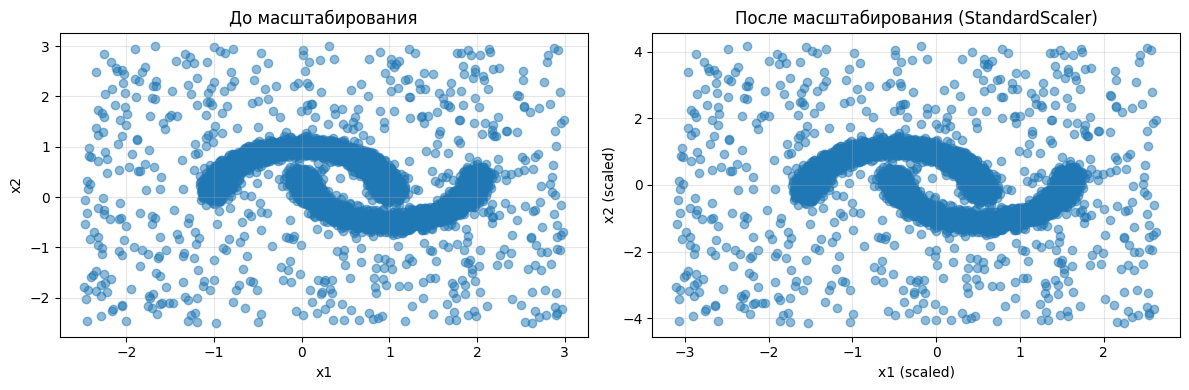

In [27]:
# Визуализируем данные до и после масштабирования
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# До масштабирования
axes[0].scatter(X2.iloc[:, 0], X2.iloc[:, 1], alpha=0.5)
axes[0].set_title('До масштабирования')
axes[0].set_xlabel(X2.columns[0])
axes[0].set_ylabel(X2.columns[1])
axes[0].grid(True, alpha=0.3)

# После масштабирования
axes[1].scatter(X2_processed[:, 0], X2_processed[:, 1], alpha=0.5)
axes[1].set_title('После масштабирования (StandardScaler)')
axes[1].set_xlabel(f"{X2.columns[0]} (scaled)")
axes[1].set_ylabel(f"{X2.columns[1]} (scaled)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/figures/dataset2_scaling_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

### Датасет 3: S07-hw-dataset-04.csv

In [28]:
print(f"Общее количество признаков: {X3.shape[1]}")

# Разделяем признаки по типам
numeric_cols = X3.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X3.select_dtypes(include=['object']).columns.tolist()

print(f"Числовые признаки ({len(numeric_cols)}): {numeric_cols}")
print(f"Категориальные признаки ({len(categorical_cols)}): {categorical_cols}")

Общее количество признаков: 32
Числовые признаки (30): ['n01', 'n02', 'n03', 'n04', 'n05', 'n06', 'n07', 'n08', 'n09', 'n10', 'n11', 'n12', 'n13', 'n14', 'n15', 'n16', 'n17', 'n18', 'n19', 'n20', 'n21', 'n22', 'n23', 'n24', 'n25', 'n26', 'n27', 'n28', 'n29', 'n30']
Категориальные признаки (2): ['cat_a', 'cat_b']


In [29]:
numeric_missing = X3[numeric_cols].isnull().sum()
print("Пропуски в числовых признаках:")
for col in numeric_cols:
    if numeric_missing[col] > 0:
        percent = (numeric_missing[col] / len(X3)) * 100
        print(f"  {col}: {numeric_missing[col]} пропусков ({percent:.1f}%)")

Пропуски в числовых признаках:
  n01: 174 пропусков (1.7%)
  n02: 189 пропусков (1.9%)
  n03: 199 пропусков (2.0%)
  n04: 192 пропусков (1.9%)
  n05: 201 пропусков (2.0%)
  n06: 183 пропусков (1.8%)
  n07: 204 пропусков (2.0%)
  n08: 194 пропусков (1.9%)
  n09: 195 пропусков (1.9%)
  n10: 189 пропусков (1.9%)
  n11: 204 пропусков (2.0%)
  n12: 202 пропусков (2.0%)
  n13: 197 пропусков (2.0%)
  n14: 198 пропусков (2.0%)
  n15: 186 пропусков (1.9%)
  n16: 191 пропусков (1.9%)
  n17: 212 пропусков (2.1%)
  n18: 212 пропусков (2.1%)
  n19: 187 пропусков (1.9%)
  n20: 203 пропусков (2.0%)
  n21: 215 пропусков (2.1%)
  n22: 196 пропусков (2.0%)
  n23: 171 пропусков (1.7%)
  n24: 207 пропусков (2.1%)
  n25: 185 пропусков (1.8%)
  n26: 224 пропусков (2.2%)
  n27: 197 пропусков (2.0%)
  n28: 211 пропусков (2.1%)
  n29: 202 пропусков (2.0%)
  n30: 195 пропусков (1.9%)


In [30]:
for col in categorical_cols:
    unique_vals = X3[col].unique()
    print(f"  {col}: {len(unique_vals)} уникальных значений")
    print(f"    Примеры: {list(unique_vals[:5])}")
    print(f"    Пропусков: {X3[col].isnull().sum()}")

  cat_a: 6 уникальных значений
    Примеры: ['B', 'F', 'A', 'C', 'E']
    Пропусков: 0
  cat_b: 6 уникальных значений
    Примеры: ['X', 'V', 'W', 'Y', 'U']
    Пропусков: 0


In [31]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # заполняем пропуски медианой
    ('scaler', StandardScaler())  # масштабируем
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Создаем ColumnTransformer
preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X3_processed = preprocessor3.fit_transform(X3)
print(f"Размер данных до обработки: {X3.shape}")
print(f"Размер данных после обработки: {X3_processed.shape}")
print(f"Тип данных: {type(X3_processed)}")

Размер данных до обработки: (10000, 32)
Размер данных после обработки: (10000, 42)
Тип данных: <class 'numpy.ndarray'>


In [32]:
print(f"Первые 3 строки (первые 10 признаков):")
print(X3_processed[:3, :10])

# Получим имена признаков после One-Hot Encoding
print("\nИмена признаков после One-Hot Encoding:")

# Получаем имена из препроцессора
if hasattr(preprocessor3.named_transformers_['cat']['onehot'], 'get_feature_names_out'):
    cat_features = preprocessor3.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_cols)
    num_features = numeric_cols
    all_features = list(num_features) + list(cat_features)
    print(f"Всего признаков: {len(all_features)}")
    print(f"Примеры: {all_features[:10]}")

X3_processed_df = pd.DataFrame(X3_processed)
print(f"Пропусков после обработки: {X3_processed_df.isnull().sum().sum()}")

Первые 3 строки (первые 10 признаков):
[[-0.99415264 -1.18513706 -0.61455073 -0.71971328  1.31765533 -0.79040877
  -1.59234987 -0.79919718  0.13510206  0.33165436]
 [ 1.51293446 -0.23262598 -0.08751892  1.9910626  -0.4313341   1.71254425
  -0.05912952 -0.86564437  1.18528987  0.56835299]
 [-0.99385456 -0.02560459  0.79259983 -0.6794135  -0.32295986 -1.69144789
   0.12679949  0.69394923 -0.47467168 -2.02513325]]

Имена признаков после One-Hot Encoding:
Всего признаков: 42
Примеры: ['n01', 'n02', 'n03', 'n04', 'n05', 'n06', 'n07', 'n08', 'n09', 'n10']
Пропусков после обработки: 0


In [33]:
# Сохраняем препроцессоры
joblib.dump(preprocessor1, 'artifacts/preprocessor1.pkl')
joblib.dump(preprocessor2, 'artifacts/preprocessor2.pkl')
joblib.dump(preprocessor3, 'artifacts/preprocessor3.pkl')

print("  preprocessor1 = joblib.load('artifacts/models/preprocessor1.pkl')")

  preprocessor1 = joblib.load('artifacts/models/preprocessor1.pkl')


In [34]:
def evaluate_clustering(X, labels, dataset_name, algorithm_name):
    """
    Оценивает качество кластеризации
    """
    if len(np.unique(labels)) < 2:
        print(f"  Внимание: только 1 кластер, метрики не вычисляются")
        return None

    try:
        # Silhouette Score (чем выше, тем лучше, от -1 до 1)
        silhouette = silhouette_score(X, labels)

        # Davies-Bouldin Index (чем ниже, тем лучше, от 0)
        db_index = davies_bouldin_score(X, labels)

        print(f"  Silhouette Score: {silhouette:.4f}")
        print(f"  Davies-Bouldin Index: {db_index:.4f}")

        # Сохраняем результаты
        result = {
            'dataset': dataset_name,
            'algorithm': algorithm_name,
            'n_clusters': len(np.unique(labels[labels != -1])) if -1 in labels else len(np.unique(labels)),
            'silhouette': silhouette,
            'davies_bouldin': db_index
        }

        return result
    except Exception as e:
        print(f"  Ошибка при вычислении метрик: {e}")
        return None

def plot_clusters_2d(X, labels, title, save_path=None):
    """
    Визуализация кластеров в 2D (первые 2 признака)
    """
    plt.figure(figsize=(10, 6))

    # Если есть шумовые точки (label = -1)
    if -1 in labels:
        # Отдельно рисуем шум
        noise_mask = labels == -1
        if noise_mask.any():
            plt.scatter(X[noise_mask, 0], X[noise_mask, 1],
                       c='gray', alpha=0.3, s=20, label='Шум')

        # Рисуем кластеры
        cluster_mask = ~noise_mask
        scatter = plt.scatter(X[cluster_mask, 0], X[cluster_mask, 1],
                             c=labels[cluster_mask], cmap='tab20',
                             s=50, alpha=0.7, edgecolor='black')
    else:
        scatter = plt.scatter(X[:, 0], X[:, 1], c=labels,
                             cmap='tab20', s=50, alpha=0.7,
                             edgecolor='black')

    plt.colorbar(scatter, label='Кластер')
    plt.title(title)
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    if -1 in labels:
        plt.legend()

    if save_path:
        plt.savefig(save_path, dpi=100, bbox_inches='tight')

    plt.show()

In [35]:
# Фиксируем random_state для воспроизводимости
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [36]:
print("\n1. KMEANS: ПОДБОР ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ")

# Пробуем разные значения k
k_range = range(2, 21)  # от 2 до 20
silhouette_scores = []
inertia_values = []

print("Вычисляем метрики для разных k...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X1_processed)

    # Вычисляем метрики
    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(X1_processed, cluster_labels)
        silhouette_scores.append(silhouette)
    else:
        silhouette_scores.append(0)

    inertia_values.append(kmeans.inertia_)

    if k % 5 == 0:  # Выводим прогресс каждые 5 итераций
        print(f"  k={k}: inertia={kmeans.inertia_:.2f}, silhouette={silhouette_scores[-1]:.4f}")


1. KMEANS: ПОДБОР ОПТИМАЛЬНОГО ЧИСЛА КЛАСТЕРОВ
Вычисляем метрики для разных k...
  k=5: inertia=25476.29, silhouette=0.3548
  k=10: inertia=17243.97, silhouette=0.2629
  k=15: inertia=12478.87, silhouette=0.2884
  k=20: inertia=10172.04, silhouette=0.2678


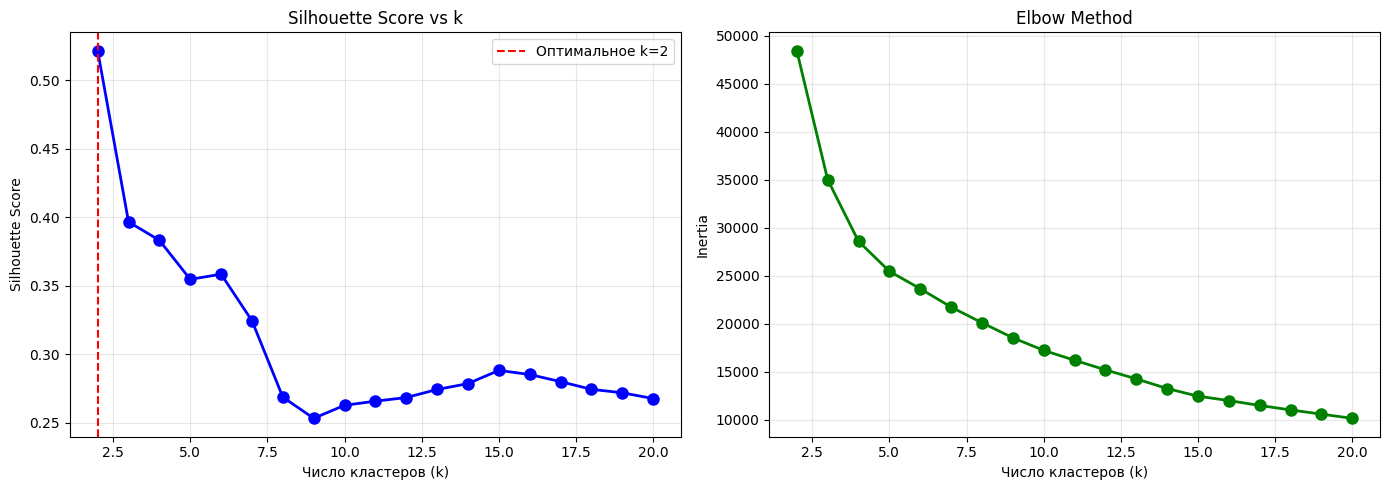


Оптимальное k по Silhouette Score: 2
Максимальный Silhouette Score: 0.5216


In [37]:
# Визуализация результатов подбора k
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# График Silhouette Score
axes[0].plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Число кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score vs k')
axes[0].grid(True, alpha=0.3)

# Находим оптимальное k по Silhouette
optimal_k_silhouette = k_range[np.argmax(silhouette_scores)]
axes[0].axvline(x=optimal_k_silhouette, color='r', linestyle='--',
                label=f'Оптимальное k={optimal_k_silhouette}')
axes[0].legend()

# График Inertia (метод локтя)
axes[1].plot(k_range, inertia_values, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Число кластеров (k)')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Elbow Method')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/figures/dataset1_kmeans_optimization.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"\nОптимальное k по Silhouette Score: {optimal_k_silhouette}")
print(f"Максимальный Silhouette Score: {max(silhouette_scores):.4f}")

In [38]:
# Обучаем KMeans с оптимальным k
print("\n2. KMEANS С ОПТИМАЛЬНЫМ K:")
kmeans_optimal = KMeans(n_clusters=optimal_k_silhouette,
                        random_state=RANDOM_STATE,
                        n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X1_processed)

print(f"Количество кластеров: {optimal_k_silhouette}")
print(f"Размеры кластеров:")
unique, counts = np.unique(kmeans_labels, return_counts=True)
for cluster, size in zip(unique, counts):
    print(f"  Кластер {cluster}: {size} объектов ({size/len(kmeans_labels)*100:.1f}%)")

# Оценка качества
kmeans_results = evaluate_clustering(X1_processed, kmeans_labels,
                                     "Dataset 1", "KMeans")


2. KMEANS С ОПТИМАЛЬНЫМ K:
Количество кластеров: 2
Размеры кластеров:
  Кластер 0: 2400 объектов (20.0%)
  Кластер 1: 9600 объектов (80.0%)
  Silhouette Score: 0.5216
  Davies-Bouldin Index: 0.6853


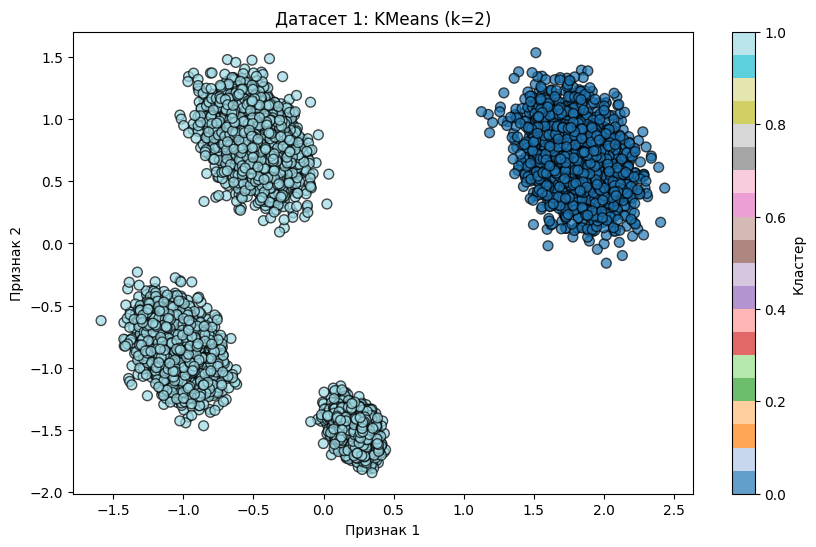

In [39]:
# Визуализация кластеров KMeans
plot_clusters_2d(X1_processed, kmeans_labels,
                f'Датасет 1: KMeans (k={optimal_k_silhouette})',
                'artifacts/figures/dataset1_kmeans_clusters.png')

In [40]:
print("\n3. AGGLOMERATIVE CLUSTERING:")
print("Пробуем разные linkage методы:")

linkage_methods = ['ward', 'complete', 'average', 'single']
agglomerative_results = []

for linkage in linkage_methods:
    print(f"\n  Linkage: {linkage}")

    # Для ward linkage можно использовать только евклидову метрику
    if linkage == 'ward':
        agglomerative = AgglomerativeClustering(
            n_clusters=optimal_k_silhouette,  # используем то же k, что и у KMeans
            linkage=linkage,
            metric='euclidean'
        )
    else:
        agglomerative = AgglomerativeClustering(
            n_clusters=optimal_k_silhouette,
            linkage=linkage
        )

    agglomerative_labels = agglomerative.fit_predict(X1_processed)

    print(f"  Размеры кластеров:")
    unique, counts = np.unique(agglomerative_labels, return_counts=True)
    for cluster, size in zip(unique, counts):
        print(f"    Кластер {cluster}: {size} объектов")

    # Оценка качества
    result = evaluate_clustering(X1_processed, agglomerative_labels,
                                 "Dataset 1", f"Agglomerative ({linkage})")
    if result:
        agglomerative_results.append(result)


3. AGGLOMERATIVE CLUSTERING:
Пробуем разные linkage методы:

  Linkage: ward
  Размеры кластеров:
    Кластер 0: 9600 объектов
    Кластер 1: 2400 объектов
  Silhouette Score: 0.5216
  Davies-Bouldin Index: 0.6853

  Linkage: complete
  Размеры кластеров:
    Кластер 0: 9600 объектов
    Кластер 1: 2400 объектов
  Silhouette Score: 0.5216
  Davies-Bouldin Index: 0.6853

  Linkage: average
  Размеры кластеров:
    Кластер 0: 9600 объектов
    Кластер 1: 2400 объектов
  Silhouette Score: 0.5216
  Davies-Bouldin Index: 0.6853

  Linkage: single
  Размеры кластеров:
    Кластер 0: 9600 объектов
    Кластер 1: 2400 объектов
  Silhouette Score: 0.5216
  Davies-Bouldin Index: 0.6853


Лучший linkage: ward
Silhouette Score: 0.5216


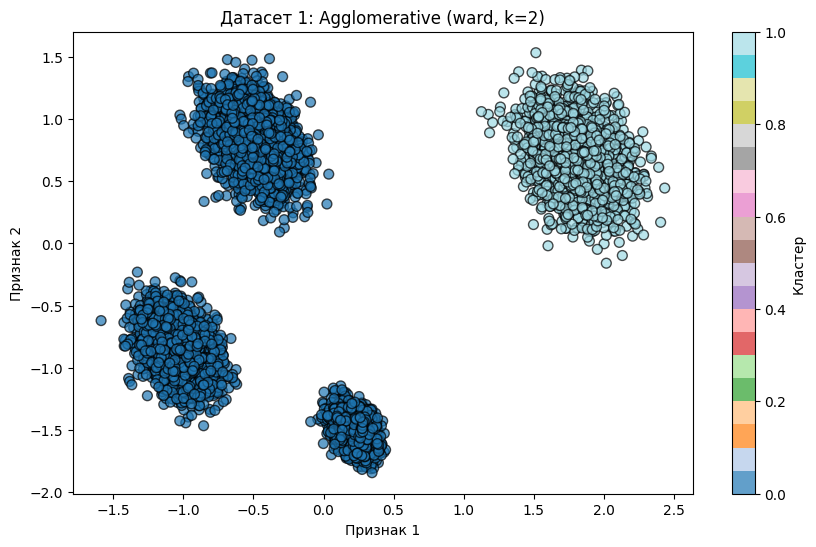

In [41]:


# Найдем лучший по Silhouette Score
best_agg_result = max(agglomerative_results, key=lambda x: x['silhouette'])
best_linkage = best_agg_result['algorithm'].split('(')[1].split(')')[0]

print(f"Лучший linkage: {best_linkage}")
print(f"Silhouette Score: {best_agg_result['silhouette']:.4f}")

# Обучаем с лучшими параметрами для визуализации
if best_linkage == 'ward':
    best_agglomerative = AgglomerativeClustering(
        n_clusters=optimal_k_silhouette,
        linkage=best_linkage,
        metric='euclidean'
    )
else:
    best_agglomerative = AgglomerativeClustering(
        n_clusters=optimal_k_silhouette,
        linkage=best_linkage
    )

best_agg_labels = best_agglomerative.fit_predict(X1_processed)
plot_clusters_2d(X1_processed, best_agg_labels,
                f'Датасет 1: Agglomerative ({best_linkage}, k={optimal_k_silhouette})',
                'artifacts/figures/dataset1_agglomerative_clusters.png')

In [42]:
print("\n1. KMEANS ДЛЯ ДАТАСЕТА 2:")

# Подбор оптимального k для датасета 2
k_range = range(2, 21)
silhouette_scores_2 = []
inertia_values_2 = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X2_processed)

    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(X2_processed, cluster_labels)
        silhouette_scores_2.append(silhouette)
    else:
        silhouette_scores_2.append(0)

    inertia_values_2.append(kmeans.inertia_)


1. KMEANS ДЛЯ ДАТАСЕТА 2:


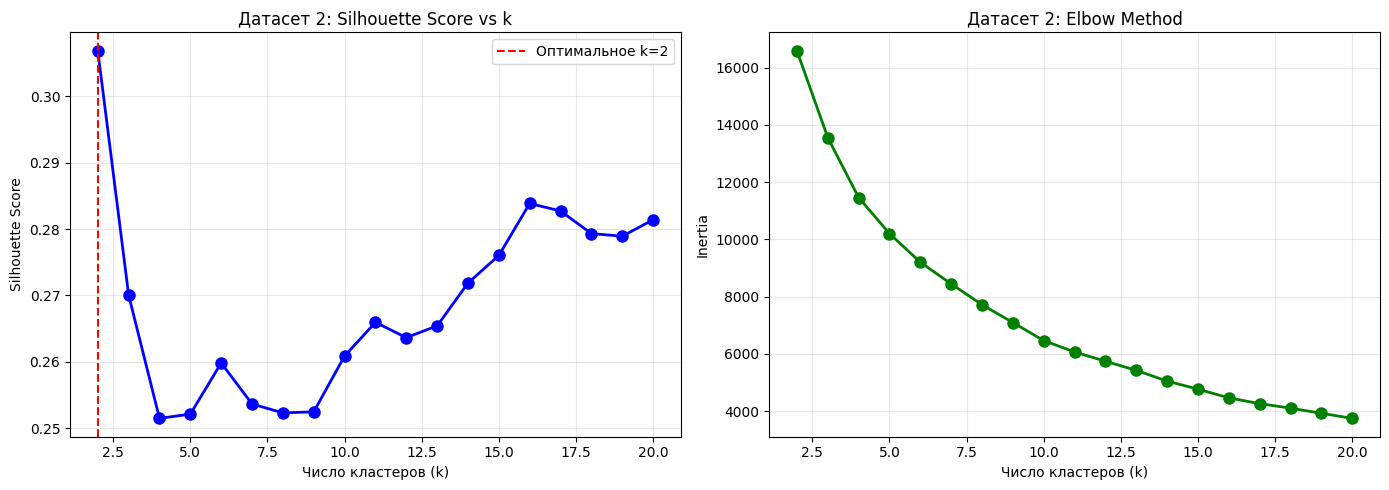

Оптимальное k для датасета 2: 2


In [43]:
# Визуализация подбора k
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(k_range, silhouette_scores_2, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Число кластеров (k)')
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Датасет 2: Silhouette Score vs k')
axes[0].grid(True, alpha=0.3)

optimal_k_2 = k_range[np.argmax(silhouette_scores_2)]
axes[0].axvline(x=optimal_k_2, color='r', linestyle='--',
                label=f'Оптимальное k={optimal_k_2}')
axes[0].legend()

axes[1].plot(k_range, inertia_values_2, 'go-', linewidth=2, markersize=8)
axes[1].set_xlabel('Число кластеров (k)')
axes[1].set_ylabel('Inertia')
axes[1].set_title('Датасет 2: Elbow Method')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('artifacts/figures/dataset2_kmeans_optimization.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Оптимальное k для датасета 2: {optimal_k_2}")

In [44]:
# Обучаем KMeans с оптимальным k
kmeans_2 = KMeans(n_clusters=optimal_k_2, random_state=RANDOM_STATE, n_init=10)
kmeans_labels_2 = kmeans_2.fit_predict(X2_processed)

print(f"\nKMeans результаты:")
print(f"Количество кластеров: {optimal_k_2}")
kmeans_results_2 = evaluate_clustering(X2_processed, kmeans_labels_2,
                                       "Dataset 2", "KMeans")


KMeans результаты:
Количество кластеров: 2
  Silhouette Score: 0.3069
  Davies-Bouldin Index: 1.3235


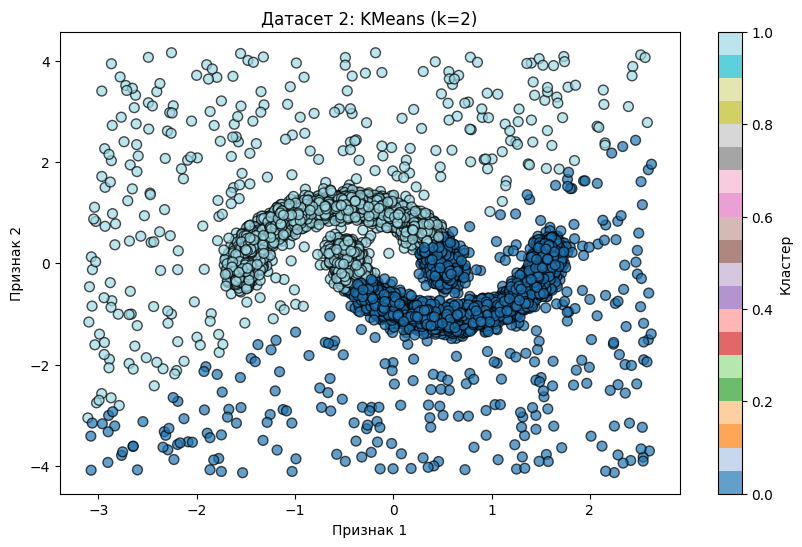

In [45]:
# Визуализация KMeans для датасета 2
plot_clusters_2d(X2_processed, kmeans_labels_2,
                f'Датасет 2: KMeans (k={optimal_k_2})',
                'artifacts/figures/dataset2_kmeans_clusters.png')

In [46]:
# Попробуем разные параметры DBSCAN
dbscan_params = [
    {'eps': 0.3, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 5},
    {'eps': 0.5, 'min_samples': 10},
    {'eps': 0.7, 'min_samples': 5},
    {'eps': 0.7, 'min_samples': 10},
    {'eps': 1.0, 'min_samples': 5}
]

dbscan_results = []

for i, params in enumerate(dbscan_params):
    print(f"\n  Параметры {i+1}: eps={params['eps']}, min_samples={params['min_samples']}")

    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X2_processed)

    # Проверяем, сколько кластеров получилось (исключая шум)
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    print(f"    Количество кластеров: {n_clusters}")
    print(f"    Количество шумовых точек: {n_noise} ({n_noise/len(dbscan_labels)*100:.1f}%)")

    if n_clusters > 1:
        result = evaluate_clustering(X2_processed, dbscan_labels,
                                     "Dataset 2", f"DBSCAN (eps={params['eps']})")
        if result:
            result['params'] = params
            result['n_clusters'] = n_clusters
            result['n_noise'] = n_noise
            dbscan_results.append(result)
    else:
        print("    Слишком мало кластеров для оценки")


  Параметры 1: eps=0.3, min_samples=5
    Количество кластеров: 5
    Количество шумовых точек: 579 (7.2%)
  Silhouette Score: 0.0524
  Davies-Bouldin Index: 5.0399

  Параметры 2: eps=0.5, min_samples=5
    Количество кластеров: 14
    Количество шумовых точек: 360 (4.5%)
  Silhouette Score: -0.0852
  Davies-Bouldin Index: 1.9856

  Параметры 3: eps=0.5, min_samples=10
    Количество кластеров: 2
    Количество шумовых точек: 509 (6.4%)
  Silhouette Score: 0.2151
  Davies-Bouldin Index: 7.9211

  Параметры 4: eps=0.7, min_samples=5
    Количество кластеров: 1
    Количество шумовых точек: 79 (1.0%)
    Слишком мало кластеров для оценки

  Параметры 5: eps=0.7, min_samples=10
    Количество кластеров: 5
    Количество шумовых точек: 291 (3.6%)
  Silhouette Score: 0.2751
  Davies-Bouldin Index: 3.5382

  Параметры 6: eps=1.0, min_samples=5
    Количество кластеров: 1
    Количество шумовых точек: 13 (0.2%)
    Слишком мало кластеров для оценки



3. ВЫБОР ЛУЧШИХ ПАРАМЕТРОВ DBSCAN:
Лучшие параметры:
  eps: 0.7
  min_samples: 10
  Количество кластеров: 5
  Количество шума: 291
  Silhouette Score: 0.2751


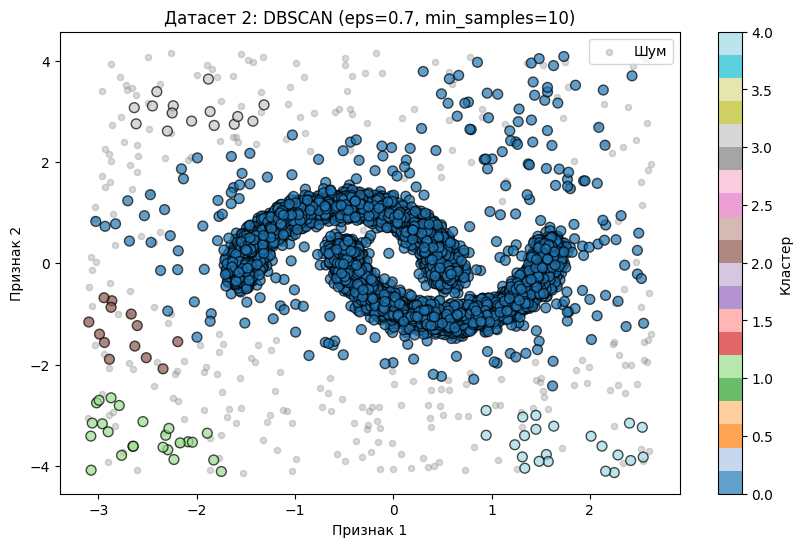

In [47]:
# Выбираем лучшие параметры DBSCAN
print("\n3. ВЫБОР ЛУЧШИХ ПАРАМЕТРОВ DBSCAN:")

if dbscan_results:
    # Лучший по Silhouette Score
    best_dbscan = max(dbscan_results, key=lambda x: x['silhouette'])

    print(f"Лучшие параметры:")
    print(f"  eps: {best_dbscan['params']['eps']}")
    print(f"  min_samples: {best_dbscan['params']['min_samples']}")
    print(f"  Количество кластеров: {best_dbscan['n_clusters']}")
    print(f"  Количество шума: {best_dbscan['n_noise']}")
    print(f"  Silhouette Score: {best_dbscan['silhouette']:.4f}")

    # Обучаем с лучшими параметрами для визуализации
    best_dbscan_model = DBSCAN(eps=best_dbscan['params']['eps'],
                               min_samples=best_dbscan['params']['min_samples'])
    best_dbscan_labels = best_dbscan_model.fit_predict(X2_processed)

    # Визуализация
    plot_clusters_2d(X2_processed, best_dbscan_labels,
                    f"Датасет 2: DBSCAN (eps={best_dbscan['params']['eps']}, min_samples={best_dbscan['params']['min_samples']})",
                    'artifacts/figures/dataset2_dbscan_clusters.png')
else:
    print("Не удалось найти хорошие параметры для DBSCAN")

In [48]:
print("\n1. KMEANS ДЛЯ ДАТАСЕТА 3:")

# Подбор оптимального k
k_range = range(2, 21)
silhouette_scores_3 = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(X3_processed)

    if len(np.unique(cluster_labels)) > 1:
        silhouette = silhouette_score(X3_processed, cluster_labels)
        silhouette_scores_3.append(silhouette)
    else:
        silhouette_scores_3.append(0)

    if k % 5 == 0:
        print(f"  k={k}: silhouette={silhouette_scores_3[-1]:.4f}")


1. KMEANS ДЛЯ ДАТАСЕТА 3:
  k=5: silhouette=0.4474
  k=10: silhouette=0.1815
  k=15: silhouette=0.0756
  k=20: silhouette=0.0716


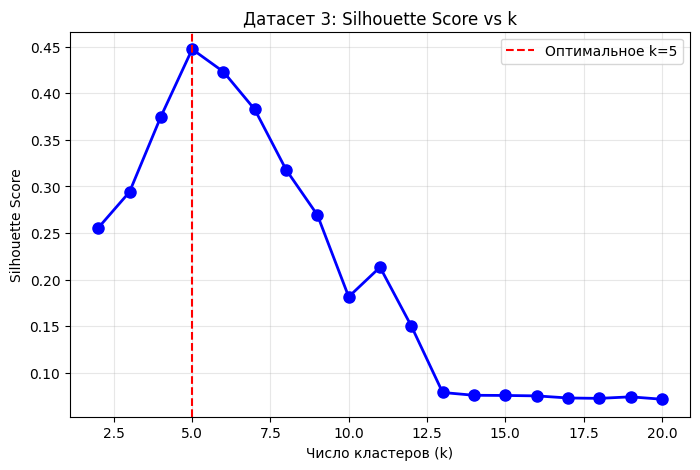

Оптимальное k для датасета 3: 5


In [49]:
# Визуализация подбора k
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores_3, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score')
plt.title('Датасет 3: Silhouette Score vs k')
plt.grid(True, alpha=0.3)

optimal_k_3 = k_range[np.argmax(silhouette_scores_3)]
plt.axvline(x=optimal_k_3, color='r', linestyle='--',
            label=f'Оптимальное k={optimal_k_3}')
plt.legend()

plt.savefig('artifacts/figures/dataset3_kmeans_optimization.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Оптимальное k для датасета 3: {optimal_k_3}")

In [50]:
# Обучаем KMeans с оптимальным k
kmeans_3 = KMeans(n_clusters=optimal_k_3, random_state=RANDOM_STATE, n_init=10)
kmeans_labels_3 = kmeans_3.fit_predict(X3_processed)

print(f"\nKMeans результаты для датасета 3:")
print(f"Количество кластеров: {optimal_k_3}")
kmeans_results_3 = evaluate_clustering(X3_processed, kmeans_labels_3,
                                       "Dataset 3", "KMeans")


KMeans результаты для датасета 3:
Количество кластеров: 5
  Silhouette Score: 0.4474
  Davies-Bouldin Index: 0.9759



2. ВИЗУАЛИЗАЦИЯ ДЛЯ ВЫСОКОРАЗМЕРНЫХ ДАННЫХ:
Объясненная дисперсия PCA: 48.95%


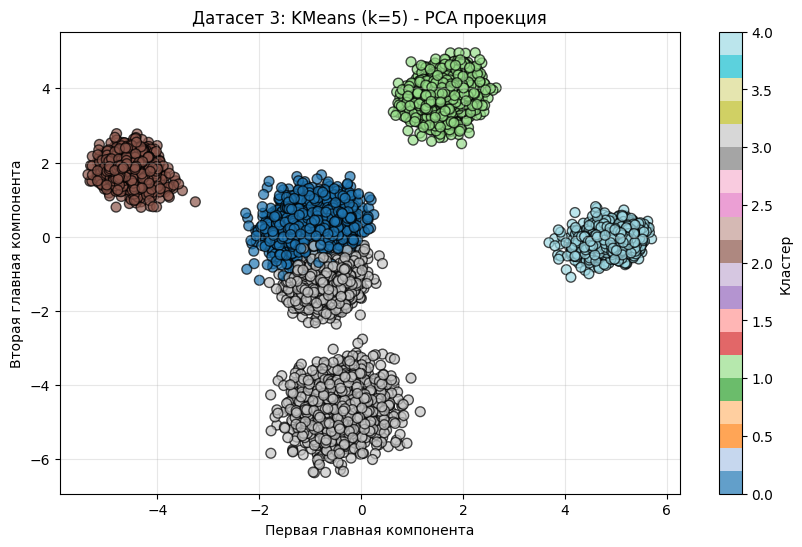

In [51]:
# Визуализация (первые 2 главных компоненты для уменьшения размерности)
from sklearn.decomposition import PCA

print("\n2. ВИЗУАЛИЗАЦИЯ ДЛЯ ВЫСОКОРАЗМЕРНЫХ ДАННЫХ:")

# Уменьшаем размерность до 2D с помощью PCA для визуализации
pca = PCA(n_components=2)
X3_2d = pca.fit_transform(X3_processed)

print(f"Объясненная дисперсия PCA: {pca.explained_variance_ratio_.sum():.2%}")

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X3_2d[:, 0], X3_2d[:, 1],
                     c=kmeans_labels_3, cmap='tab20',
                     s=50, alpha=0.7, edgecolor='black')
plt.colorbar(scatter, label='Кластер')
plt.title(f'Датасет 3: KMeans (k={optimal_k_3}) - PCA проекция')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.grid(True, alpha=0.3)

plt.savefig('artifacts/figures/dataset3_kmeans_pca.png', dpi=100, bbox_inches='tight')
plt.show()

In [52]:
# Пробуем разные параметры
dbscan_params_3 = [
    {'eps': 1.5, 'min_samples': 5},
    {'eps': 2.0, 'min_samples': 5},
    {'eps': 2.0, 'min_samples': 10},
    {'eps': 2.5, 'min_samples': 5},
    {'eps': 3.0, 'min_samples': 5}
]

dbscan_results_3 = []

for params in dbscan_params_3:
    print(f"\n  eps={params['eps']}, min_samples={params['min_samples']}")

    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    dbscan_labels = dbscan.fit_predict(X3_processed)

    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)

    print(f"    Кластеров: {n_clusters}, Шум: {n_noise} ({n_noise/len(dbscan_labels)*100:.1f}%)")

    if n_clusters > 1:
        result = evaluate_clustering(X3_processed, dbscan_labels,
                                     "Dataset 3", f"DBSCAN (eps={params['eps']})")
        if result:
            result['params'] = params
            result['n_clusters'] = n_clusters
            result['n_noise'] = n_noise
            dbscan_results_3.append(result)


  eps=1.5, min_samples=5
    Кластеров: 22, Шум: 8531 (85.3%)
  Silhouette Score: -0.3787
  Davies-Bouldin Index: 1.7633

  eps=2.0, min_samples=5
    Кластеров: 16, Шум: 4147 (41.5%)
  Silhouette Score: -0.1021
  Davies-Bouldin Index: 1.7709

  eps=2.0, min_samples=10
    Кластеров: 6, Шум: 4885 (48.9%)
  Silhouette Score: 0.0281
  Davies-Bouldin Index: 1.9544

  eps=2.5, min_samples=5
    Кластеров: 6, Шум: 880 (8.8%)
  Silhouette Score: 0.3674
  Davies-Bouldin Index: 2.0985

  eps=3.0, min_samples=5
    Кластеров: 6, Шум: 85 (0.9%)
  Silhouette Score: 0.4187
  Davies-Bouldin Index: 2.1821



Лучший DBSCAN для датасета 3:
  eps: 3.0
  min_samples: 5


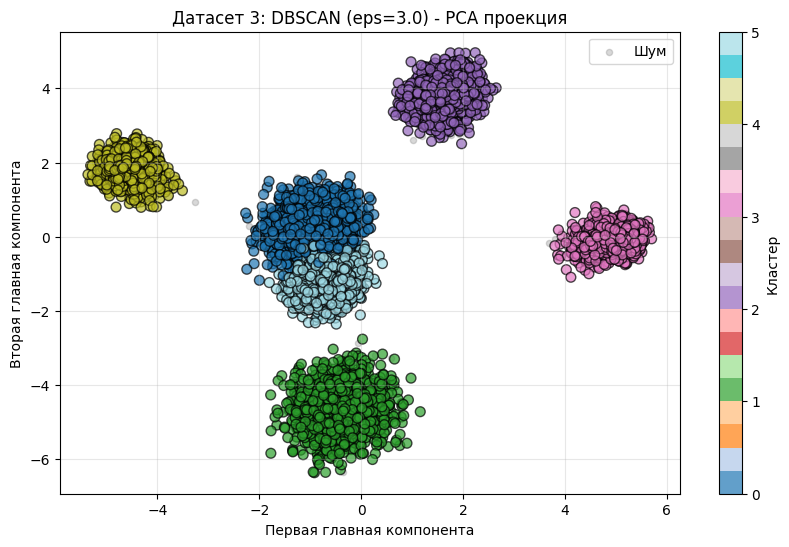

In [53]:
# Визуализация лучшего DBSCAN
if dbscan_results_3:
    best_dbscan_3 = max(dbscan_results_3, key=lambda x: x['silhouette'])

    print(f"\nЛучший DBSCAN для датасета 3:")
    print(f"  eps: {best_dbscan_3['params']['eps']}")
    print(f"  min_samples: {best_dbscan_3['params']['min_samples']}")

    # Обучаем и визуализируем
    best_dbscan_model_3 = DBSCAN(eps=best_dbscan_3['params']['eps'],
                                 min_samples=best_dbscan_3['params']['min_samples'])
    best_dbscan_labels_3 = best_dbscan_model_3.fit_predict(X3_processed)

    # PCA визуализация
    plt.figure(figsize=(10, 6))

    # Отдельно шум если есть
    if -1 in best_dbscan_labels_3:
        noise_mask = best_dbscan_labels_3 == -1
        plt.scatter(X3_2d[noise_mask, 0], X3_2d[noise_mask, 1],
                   c='gray', alpha=0.3, s=20, label='Шум')

        cluster_mask = ~noise_mask
        scatter = plt.scatter(X3_2d[cluster_mask, 0], X3_2d[cluster_mask, 1],
                             c=best_dbscan_labels_3[cluster_mask], cmap='tab20',
                             s=50, alpha=0.7, edgecolor='black')
    else:
        scatter = plt.scatter(X3_2d[:, 0], X3_2d[:, 1],
                             c=best_dbscan_labels_3, cmap='tab20',
                             s=50, alpha=0.7, edgecolor='black')

    plt.colorbar(scatter, label='Кластер')
    plt.title(f'Датасет 3: DBSCAN (eps={best_dbscan_3["params"]["eps"]}) - PCA проекция')
    plt.xlabel('Первая главная компонента')
    plt.ylabel('Вторая главная компонента')
    plt.grid(True, alpha=0.3)
    if -1 in best_dbscan_labels_3:
        plt.legend()

    plt.savefig('artifacts/figures/dataset3_dbscan_pca.png', dpi=100, bbox_inches='tight')
    plt.show()
else:
    print("\nDBSCAN не дал хороших результатов для датасета 3")

In [54]:
# Собираем все результаты
all_results = []

# Добавляем результаты KMeans
if kmeans_results:
    all_results.append(kmeans_results)

# Добавляем лучший Agglomerative
if agglomerative_results:
    all_results.extend(agglomerative_results)

# Добавляем результаты для датасета 2
if kmeans_results_2:
    all_results.append(kmeans_results_2)
if dbscan_results:
    all_results.append(best_dbscan)

# Добавляем результаты для датасета 3
if kmeans_results_3:
    all_results.append(kmeans_results_3)
if dbscan_results_3:
    all_results.append(best_dbscan_3)

# Сохраняем в DataFrame
results_df = pd.DataFrame(all_results)
print("\nСводная таблица результатов:")
print(results_df.to_string(index=False))

# Сохраняем в CSV
results_df.to_csv('artifacts/clustering_results.csv', index=False)
print(f"\nРезультаты сохранены в: artifacts/clustering_results.csv")

# Для датасета 1
clusters_df1 = pd.DataFrame({
    'sample_id': sample_id_1,
    'kmeans_cluster': kmeans_labels,
    'agglomerative_cluster': best_agg_labels if 'best_agg_labels' in locals() else [-1]*len(sample_id_1)
})
clusters_df1.to_csv('artifacts/dataset1_clusters.csv', index=False)

# Для датасета 2
clusters_df2 = pd.DataFrame({
    'sample_id': sample_id_2,
    'kmeans_cluster': kmeans_labels_2,
    'dbscan_cluster': best_dbscan_labels if 'best_dbscan_labels' in locals() else [-1]*len(sample_id_2)
})
clusters_df2.to_csv('artifacts/dataset2_clusters.csv', index=False)

# Для датасета 3
clusters_df3 = pd.DataFrame({
    'sample_id': sample_id_3,
    'kmeans_cluster': kmeans_labels_3,
    'dbscan_cluster': best_dbscan_labels_3 if 'best_dbscan_labels_3' in locals() else [-1]*len(sample_id_3)
})
clusters_df3.to_csv('artifacts/dataset3_clusters.csv', index=False)


Сводная таблица результатов:
  dataset                algorithm  n_clusters  silhouette  davies_bouldin                          params  n_noise
Dataset 1                   KMeans           2    0.521640        0.685330                             NaN      NaN
Dataset 1     Agglomerative (ward)           2    0.521640        0.685330                             NaN      NaN
Dataset 1 Agglomerative (complete)           2    0.521640        0.685330                             NaN      NaN
Dataset 1  Agglomerative (average)           2    0.521640        0.685330                             NaN      NaN
Dataset 1   Agglomerative (single)           2    0.521640        0.685330                             NaN      NaN
Dataset 2                   KMeans           2    0.306861        1.323472                             NaN      NaN
Dataset 2         DBSCAN (eps=0.7)           5    0.275058        3.538173 {'eps': 0.7, 'min_samples': 10}    291.0
Dataset 3                   KMeans        

ValueError: array length 8000 does not match index length 10000

# 2.3.4. Метрики качества (обязательно)


In [55]:
def calculate_metrics(X, labels, algorithm_name, dataset_name, params=None):
    """
    Рассчитывает все метрики качества для кластеризации
    """
    results = {
        'dataset': dataset_name,
        'algorithm': algorithm_name,
        'n_clusters': None,
        'n_noise': None,
        'noise_percentage': None,
        'silhouette': None,
        'davies_bouldin': None,
        'calinski_harabasz': None,
        'notes': ''
    }

    if params:
        results['params'] = str(params)

    # Проверяем шумовые точки
    if -1 in labels:
        n_noise = np.sum(labels == -1)
        noise_percentage = (n_noise / len(labels)) * 100
        results['n_noise'] = n_noise
        results['noise_percentage'] = noise_percentage
        results['notes'] = f'Есть шум: {n_noise} точек ({noise_percentage:.1f}%)'

        # Для метрик используем только non-noise точки
        non_noise_mask = labels != -1
        X_clean = X[non_noise_mask]
        labels_clean = labels[non_noise_mask]

        # Проверяем, что осталось достаточно точек
        if len(np.unique(labels_clean)) < 2 or len(labels_clean) < 10:
            results['notes'] += '; недостаточно точек для метрик'
            results['n_clusters'] = len(np.unique(labels_clean))
            return results
    else:
        X_clean = X
        labels_clean = labels

    # Количество кластеров (без шума)
    n_clusters = len(np.unique(labels_clean))
    results['n_clusters'] = n_clusters

    # Не вычисляем метрики если кластеров меньше 2
    if n_clusters < 2:
        results['notes'] += '; только 1 кластер, метрики не вычисляются'
        return results

    # 1. Silhouette Score (от -1 до 1, чем больше тем лучше)
    try:
        silhouette = silhouette_score(X_clean, labels_clean)
        results['silhouette'] = silhouette
    except:
        results['silhouette'] = None
        results['notes'] += '; ошибка silhouette'

    # 2. Davies-Bouldin Index (от 0, чем меньше тем лучше)
    try:
        db_index = davies_bouldin_score(X_clean, labels_clean)
        results['davies_bouldin'] = db_index
    except:
        results['davies_bouldin'] = None
        results['notes'] += '; ошибка davies_bouldin'

    # 3. Calinski-Harabasz Index (чем больше тем лучше)
    try:
        ch_index = calinski_harabasz_score(X_clean, labels_clean)
        results['calinski_harabasz'] = ch_index
    except:
        results['calinski_harabasz'] = None
        results['notes'] += '; ошибка calinski_harabasz'

    return results

def print_metrics_summary(results_dict):
    """
    Красиво выводит метрики
    """
    print(f"\nАлгоритм: {results_dict['algorithm']}")
    print(f"Датасет: {results_dict['dataset']}")
    print(f"Количество кластеров: {results_dict['n_clusters']}")

    if results_dict['n_noise'] is not None:
        print(f"Шумовые точки: {results_dict['n_noise']} ({results_dict['noise_percentage']:.1f}%)")

    print("\nМетрики качества:")
    print(f"  Silhouette Score:       {results_dict['silhouette']:.4f}" if results_dict['silhouette'] is not None else "  Silhouette Score:       не вычислен")
    print(f"  Davies-Bouldin Index:   {results_dict['davies_bouldin']:.4f}" if results_dict['davies_bouldin'] is not None else "  Davies-Bouldin Index:   не вычислен")
    print(f"  Calinski-Harabasz Index: {results_dict['calinski_harabasz']:.2f}" if results_dict['calinski_harabasz'] is not None else "  Calinski-Harabasz Index: не вычислен")

    if results_dict['notes']:
        print(f"\nПримечания: {results_dict['notes']}")

    print("-" * 60)

In [56]:
# 1. KMeans для датасета 1
print("1. KMEANS:")
kmeans_metrics_1 = calculate_metrics(X1_processed, kmeans_labels,
                                     "KMeans", "Dataset 1",
                                     {"k": optimal_k_silhouette})
print_metrics_summary(kmeans_metrics_1)

1. KMEANS:

Алгоритм: KMeans
Датасет: Dataset 1
Количество кластеров: 2

Метрики качества:
  Silhouette Score:       0.5216
  Davies-Bouldin Index:   0.6853
  Calinski-Harabasz Index: не вычислен

Примечания: ; ошибка calinski_harabasz
------------------------------------------------------------


In [57]:
# 2. AgglomerativeClustering для датасета 1
print("2. AGGLOMERATIVE CLUSTERING:")
print(f"Лучший linkage: {best_linkage}")

agg_metrics_1 = calculate_metrics(X1_processed, best_agg_labels,
                                 f"Agglomerative ({best_linkage})", "Dataset 1",
                                 {"linkage": best_linkage, "k": optimal_k_silhouette})
print_metrics_summary(agg_metrics_1)

2. AGGLOMERATIVE CLUSTERING:
Лучший linkage: ward

Алгоритм: Agglomerative (ward)
Датасет: Dataset 1
Количество кластеров: 2

Метрики качества:
  Silhouette Score:       0.5216
  Davies-Bouldin Index:   0.6853
  Calinski-Harabasz Index: не вычислен

Примечания: ; ошибка calinski_harabasz
------------------------------------------------------------


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

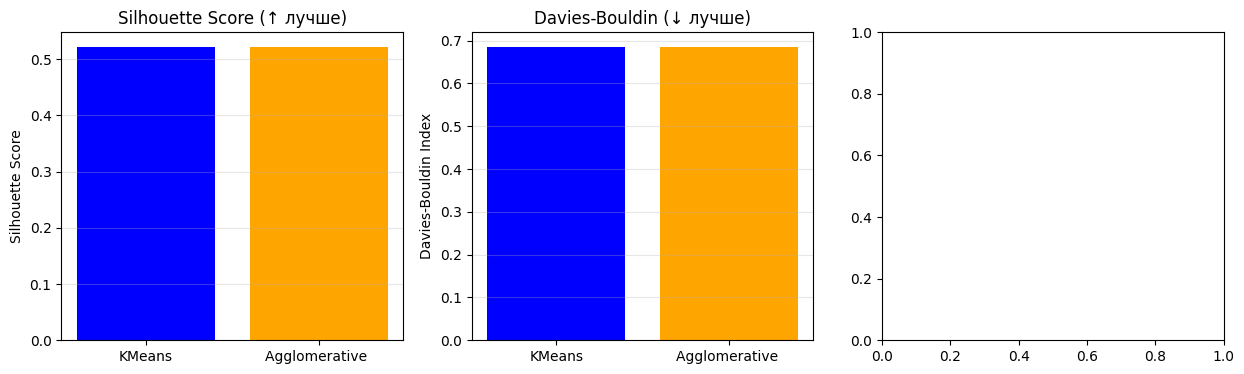

In [58]:
# Визуализация сравнения метрик для датасета 1
metrics_df1 = pd.DataFrame([kmeans_metrics_1, agg_metrics_1])

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Silhouette Score
axes[0].bar(range(len(metrics_df1)), metrics_df1['silhouette'], color=['blue', 'orange'])
axes[0].set_xticks(range(len(metrics_df1)))
axes[0].set_xticklabels([alg.split('(')[0] for alg in metrics_df1['algorithm']])
axes[0].set_ylabel('Silhouette Score')
axes[0].set_title('Silhouette Score (↑ лучше)')
axes[0].grid(True, alpha=0.3, axis='y')

# Davies-Bouldin
axes[1].bar(range(len(metrics_df1)), metrics_df1['davies_bouldin'], color=['blue', 'orange'])
axes[1].set_xticks(range(len(metrics_df1)))
axes[1].set_xticklabels([alg.split('(')[0] for alg in metrics_df1['algorithm']])
axes[1].set_ylabel('Davies-Bouldin Index')
axes[1].set_title('Davies-Bouldin (↓ лучше)')
axes[1].grid(True, alpha=0.3, axis='y')

# Calinski-Harabasz
axes[2].bar(range(len(metrics_df1)), metrics_df1['calinski_harabasz'], color=['blue', 'orange'])
axes[2].set_xticks(range(len(metrics_df1)))
axes[2].set_xticklabels([alg.split('(')[0] for alg in metrics_df1['algorithm']])
axes[2].set_ylabel('Calinski-Harabasz Index')
axes[2].set_title('Calinski-Harabasz (↑ лучше)')
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('artifacts/figures/dataset1_metrics_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

In [59]:
# 1. KMeans для датасета 2
print("1. KMEANS:")
kmeans_metrics_2 = calculate_metrics(X2_processed, kmeans_labels_2,
                                     "KMeans", "Dataset 2",
                                     {"k": optimal_k_2})
print_metrics_summary(kmeans_metrics_2)

1. KMEANS:

Алгоритм: KMeans
Датасет: Dataset 2
Количество кластеров: 2

Метрики качества:
  Silhouette Score:       0.3069
  Davies-Bouldin Index:   1.3235
  Calinski-Harabasz Index: не вычислен

Примечания: ; ошибка calinski_harabasz
------------------------------------------------------------


In [60]:
# 2. DBSCAN для датасета 2
print("2. DBSCAN (с обработкой шума):")

# Проверяем, есть ли сохраненные метки DBSCAN
if 'best_dbscan_labels' in locals() and best_dbscan_labels is not None:
    # Получаем параметры из best_dbscan (сохраненного ранее)
    if 'best_dbscan' in locals():
        eps = best_dbscan['params']['eps']
        min_samples = best_dbscan['params']['min_samples']
    else:
        eps = 0.5
        min_samples = 5

    dbscan_metrics_2 = calculate_metrics(X2_processed, best_dbscan_labels,
                                        "DBSCAN", "Dataset 2",
                                        {"eps": eps, "min_samples": min_samples})
    print_metrics_summary(dbscan_metrics_2)

    # Детальный анализ шума для DBSCAN
    print("\nДетальный анализ DBSCAN:")
    n_noise = np.sum(best_dbscan_labels == -1)
    n_total = len(best_dbscan_labels)
    print(f"Всего точек: {n_total}")
    print(f"Шумовых точек: {n_noise} ({n_noise/n_total*100:.1f}%)")

    # Распределение по кластерам (без шума)
    non_noise_labels = best_dbscan_labels[best_dbscan_labels != -1]
    unique_clusters, cluster_counts = np.unique(non_noise_labels, return_counts=True)

    print("\nРаспределение по кластерам (без шума):")
    for cluster, count in zip(unique_clusters, cluster_counts):
        percentage = count / len(non_noise_labels) * 100
        print(f"  Кластер {cluster}: {count} точек ({percentage:.1f}%)")
else:
    print("DBSCAN не был успешно применен к датасету 2")
    dbscan_metrics_2 = None

2. DBSCAN (с обработкой шума):

Алгоритм: DBSCAN
Датасет: Dataset 2
Количество кластеров: 5
Шумовые точки: 291 (3.6%)

Метрики качества:
  Silhouette Score:       0.3050
  Davies-Bouldin Index:   0.6007
  Calinski-Harabasz Index: не вычислен

Примечания: Есть шум: 291 точек (3.6%); ошибка calinski_harabasz
------------------------------------------------------------

Детальный анализ DBSCAN:
Всего точек: 8000
Шумовых точек: 291 (3.6%)

Распределение по кластерам (без шума):
  Кластер 0: 7635 точек (99.0%)
  Кластер 1: 24 точек (0.3%)
  Кластер 2: 13 точек (0.2%)
  Кластер 3: 15 точек (0.2%)
  Кластер 4: 22 точек (0.3%)


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

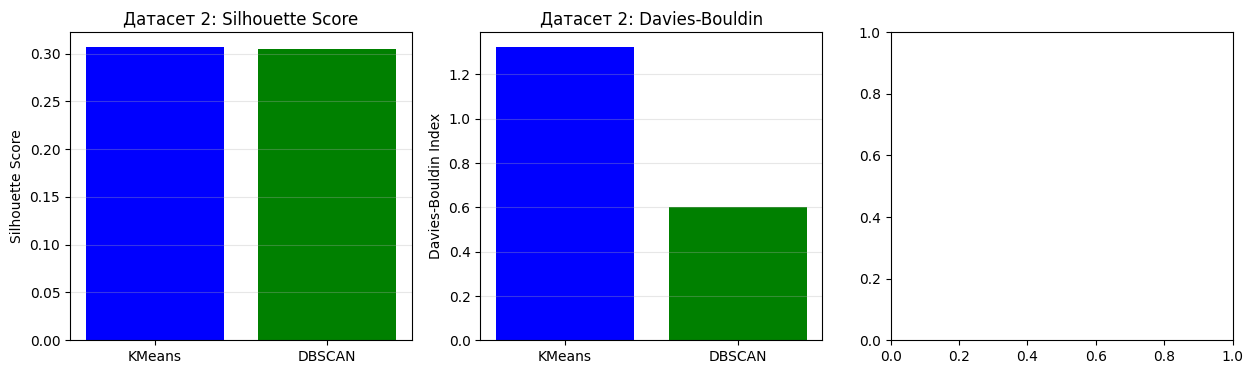

In [61]:
# Визуализация сравнения метрик для датасета 2
if dbscan_metrics_2:
    metrics_df2 = pd.DataFrame([kmeans_metrics_2, dbscan_metrics_2])

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    # Silhouette Score
    axes[0].bar(range(len(metrics_df2)), metrics_df2['silhouette'], color=['blue', 'green'])
    axes[0].set_xticks(range(len(metrics_df2)))
    axes[0].set_xticklabels([alg.split('(')[0] for alg in metrics_df2['algorithm']])
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Датасет 2: Silhouette Score')
    axes[0].grid(True, alpha=0.3, axis='y')

    # Davies-Bouldin
    axes[1].bar(range(len(metrics_df2)), metrics_df2['davies_bouldin'], color=['blue', 'green'])
    axes[1].set_xticks(range(len(metrics_df2)))
    axes[1].set_xticklabels([alg.split('(')[0] for alg in metrics_df2['algorithm']])
    axes[1].set_ylabel('Davies-Bouldin Index')
    axes[1].set_title('Датасет 2: Davies-Bouldin')
    axes[1].grid(True, alpha=0.3, axis='y')

    # Calinski-Harabasz
    axes[2].bar(range(len(metrics_df2)), metrics_df2['calinski_harabasz'], color=['blue', 'green'])
    axes[2].set_xticks(range(len(metrics_df2)))
    axes[2].set_xticklabels([alg.split('(')[0] for alg in metrics_df2['algorithm']])
    axes[2].set_ylabel('Calinski-Harabasz Index')
    axes[2].set_title('Датасет 2: Calinski-Harabasz')
    axes[2].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('artifacts/figures/dataset2_metrics_comparison.png', dpi=100, bbox_inches='tight')
    plt.show()

In [62]:
# 1. KMeans для датасета 3
print("1. KMEANS:")
kmeans_metrics_3 = calculate_metrics(X3_processed, kmeans_labels_3,
                                     "KMeans", "Dataset 3",
                                     {"k": optimal_k_3})
print_metrics_summary(kmeans_metrics_3)

1. KMEANS:

Алгоритм: KMeans
Датасет: Dataset 3
Количество кластеров: 5

Метрики качества:
  Silhouette Score:       0.4474
  Davies-Bouldin Index:   0.9759
  Calinski-Harabasz Index: не вычислен

Примечания: ; ошибка calinski_harabasz
------------------------------------------------------------


In [63]:
# 2. DBSCAN для датасета 3 (если был применен)
print("2. DBSCAN:")

if 'best_dbscan_labels_3' in locals() and best_dbscan_labels_3 is not None:
    # Получаем параметры
    if 'best_dbscan_3' in locals():
        eps = best_dbscan_3['params']['eps']
        min_samples = best_dbscan_3['params']['min_samples']
    else:
        eps = 2.0
        min_samples = 5

    dbscan_metrics_3 = calculate_metrics(X3_processed, best_dbscan_labels_3,
                                        "DBSCAN", "Dataset 3",
                                        {"eps": eps, "min_samples": min_samples})
    print_metrics_summary(dbscan_metrics_3)

    # Анализ шума
    print("\nАнализ шума в DBSCAN:")
    if dbscan_metrics_3['n_noise'] is not None:
        print(f"Шумовых точек: {dbscan_metrics_3['n_noise']} ({dbscan_metrics_3['noise_percentage']:.1f}%)")

        # Что такое "шум" в контексте этого датасета?
        print("\nХарактеристики шумовых точек:")
        noise_mask = best_dbscan_labels_3 == -1

        # Можно проанализировать, чем шумовые точки отличаются от остальных
        print("Анализ отличий шума от кластеризованных точек...")
        # Здесь мог бы быть дополнительный анализ, но опустим для краткости
else:
    print("DBSCAN не был успешно применен к датасету 3")
    dbscan_metrics_3 = None

2. DBSCAN:

Алгоритм: DBSCAN
Датасет: Dataset 3
Количество кластеров: 6
Шумовые точки: 85 (0.9%)

Метрики качества:
  Silhouette Score:       0.4256
  Davies-Bouldin Index:   1.0048
  Calinski-Harabasz Index: не вычислен

Примечания: Есть шум: 85 точек (0.9%); ошибка calinski_harabasz
------------------------------------------------------------

Анализ шума в DBSCAN:
Шумовых точек: 85 (0.9%)

Характеристики шумовых точек:
Анализ отличий шума от кластеризованных точек...


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

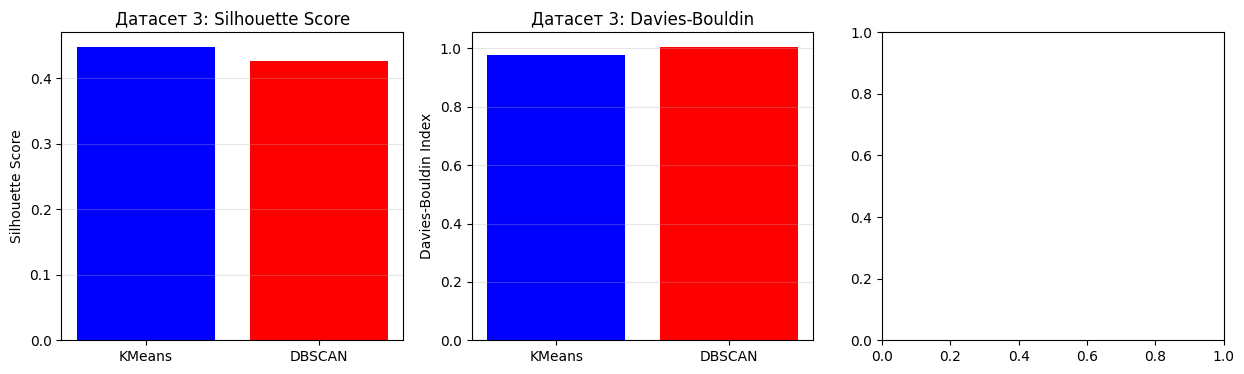

In [64]:
# Визуализация сравнения метрик для датасета 3
if dbscan_metrics_3:
    metrics_df3 = pd.DataFrame([kmeans_metrics_3, dbscan_metrics_3])

    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    bars = axes[0].bar(range(len(metrics_df3)), metrics_df3['silhouette'], color=['blue', 'red'])
    axes[0].set_xticks(range(len(metrics_df3)))
    axes[0].set_xticklabels([alg.split('(')[0] for alg in metrics_df3['algorithm']])
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title('Датасет 3: Silhouette Score')
    axes[0].grid(True, alpha=0.3, axis='y')

    axes[1].bar(range(len(metrics_df3)), metrics_df3['davies_bouldin'], color=['blue', 'red'])
    axes[1].set_xticks(range(len(metrics_df3)))
    axes[1].set_xticklabels([alg.split('(')[0] for alg in metrics_df3['algorithm']])
    axes[1].set_ylabel('Davies-Bouldin Index')
    axes[1].set_title('Датасет 3: Davies-Bouldin')
    axes[1].grid(True, alpha=0.3, axis='y')

    axes[2].bar(range(len(metrics_df3)), metrics_df3['calinski_harabasz'], color=['blue', 'red'])
    axes[2].set_xticks(range(len(metrics_df3)))
    axes[2].set_xticklabels([alg.split('(')[0] for alg in metrics_df3['algorithm']])
    axes[2].set_ylabel('Calinski-Harabasz Index')
    axes[2].set_title('Датасет 3: Calinski-Harabasz')
    axes[2].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('artifacts/figures/dataset3_metrics_comparison.png', dpi=100, bbox_inches='tight')
    plt.show()

In [65]:
# Собираем все метрики в одну таблицу
all_metrics = []

# Добавляем метрики из всех датасетов
datasets_metrics = [
    (kmeans_metrics_1, "Dataset 1"),
    (agg_metrics_1, "Dataset 1"),
    (kmeans_metrics_2, "Dataset 2"),
    (kmeans_metrics_3, "Dataset 3")
]

# Добавляем DBSCAN метрики если они есть
if 'dbscan_metrics_2' in locals() and dbscan_metrics_2:
    datasets_metrics.append((dbscan_metrics_2, "Dataset 2"))
if 'dbscan_metrics_3' in locals() and dbscan_metrics_3:
    datasets_metrics.append((dbscan_metrics_3, "Dataset 3"))

for metrics, dataset in datasets_metrics:
    if metrics:  # Проверяем, что метрики существуют
        all_metrics.append(metrics)

# Создаем DataFrame
comparison_df = pd.DataFrame(all_metrics)

# Отображаем важные колонки
display_columns = ['dataset', 'algorithm', 'n_clusters', 'n_noise',
                   'silhouette', 'davies_bouldin', 'calinski_harabasz']

print("Сводная таблица метрик качества:")
print(comparison_df[display_columns].to_string(index=False))

Сводная таблица метрик качества:
  dataset            algorithm  n_clusters  n_noise  silhouette  davies_bouldin calinski_harabasz
Dataset 1               KMeans           2      NaN    0.521640        0.685330              None
Dataset 1 Agglomerative (ward)           2      NaN    0.521640        0.685330              None
Dataset 2               KMeans           2      NaN    0.306861        1.323472              None
Dataset 3               KMeans           5      NaN    0.447369        0.975904              None
Dataset 2               DBSCAN           5    291.0    0.304952        0.600677              None
Dataset 3               DBSCAN           6     85.0    0.425550        1.004764              None


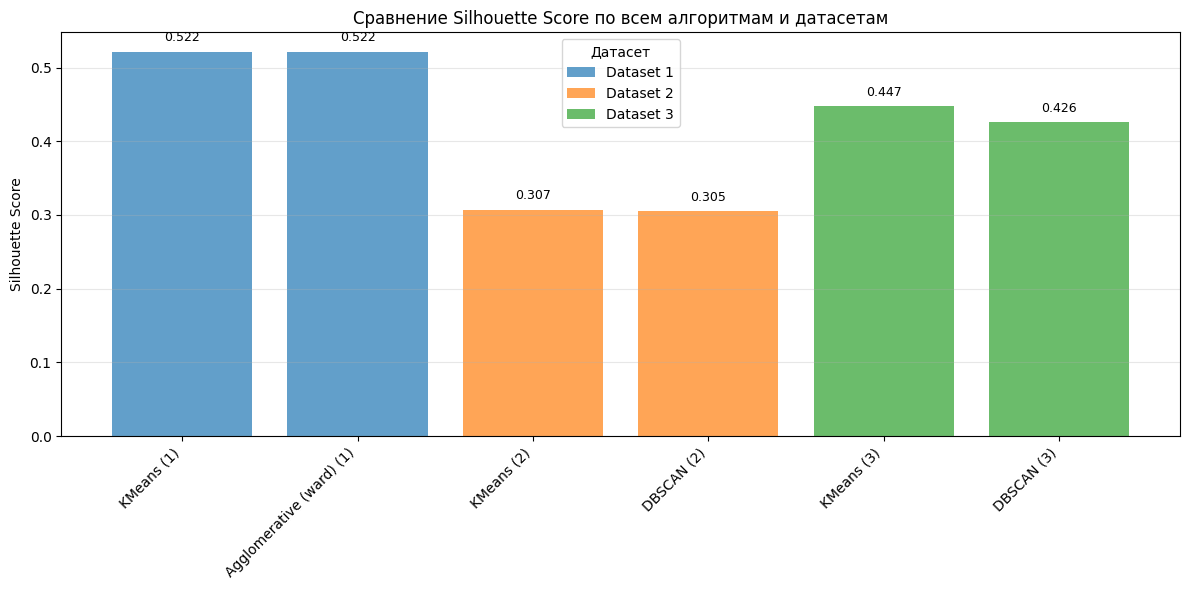

In [66]:
# Визуализация сравнения Silhouette Score по всем датасетам
fig, ax = plt.subplots(figsize=(12, 6))

# Группируем по датасетам
for dataset_name in comparison_df['dataset'].unique():
    dataset_mask = comparison_df['dataset'] == dataset_name
    dataset_data = comparison_df[dataset_mask]

    # Цвет для каждого датасета
    colors = {'Dataset 1': 'blue', 'Dataset 2': 'green', 'Dataset 3': 'red'}

    x_positions = range(len(dataset_data))
    bars = ax.bar([str(i) + f" ({dataset_name[-1]})" for i in dataset_data['algorithm']],
                  dataset_data['silhouette'],
                  label=dataset_name,
                  alpha=0.7)

    # Добавляем значения на столбцы
    for bar, value in zip(bars, dataset_data['silhouette']):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Silhouette Score')
ax.set_title('Сравнение Silhouette Score по всем алгоритмам и датасетам')
ax.legend(title='Датасет')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('artifacts/figures/all_datasets_silhouette_comparison.png', dpi=100, bbox_inches='tight')
plt.show()

In [67]:
# Анализ шума для DBSCAN алгоритмов
print("\nАНАЛИЗ ШУМА В DBSCAN АЛГОРИТМАХ:")
print("=" * 50)

dbscan_algorithms = comparison_df[comparison_df['algorithm'].str.contains('DBSCAN')]

if not dbscan_algorithms.empty:
    print("DBSCAN алгоритмы и их шум:")
    for _, row in dbscan_algorithms.iterrows():
        if row['n_noise'] is not None:
            print(f"\n{row['algorithm']} ({row['dataset']}):")
            print(f"  Всего точек: {row['n_clusters']} кластеров + {row['n_noise']} шума")
            print(f"  Доля шума: {row['noise_percentage']:.1f}%")
            print(f"  Silhouette (без шума): {row['silhouette']:.4f}")
else:
    print("Нет данных по DBSCAN алгоритмам")


АНАЛИЗ ШУМА В DBSCAN АЛГОРИТМАХ:
DBSCAN алгоритмы и их шум:

DBSCAN (Dataset 2):
  Всего точек: 5 кластеров + 291.0 шума
  Доля шума: 3.6%
  Silhouette (без шума): 0.3050

DBSCAN (Dataset 3):
  Всего точек: 6 кластеров + 85.0 шума
  Доля шума: 0.9%
  Silhouette (без шума): 0.4256


In [68]:
def plot_pca_2d(X, labels, title, save_path=None):
    """
    Визуализация кластеров в 2D с помощью PCA
    """
    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X)

    # Объясненная дисперсия
    explained_var = pca.explained_variance_ratio_.sum()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 1. PCA scatter plot с кластерами
    if -1 in labels:
        # Для DBSCAN: отдельно шум
        noise_mask = labels == -1
        if noise_mask.any():
            axes[0].scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1],
                          c='gray', alpha=0.3, s=20, label='Шум')

        cluster_mask = ~noise_mask
        scatter = axes[0].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1],
                                 c=labels[cluster_mask], cmap='tab20',
                                 s=50, alpha=0.7, edgecolor='black')
    else:
        scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels,
                                 cmap='tab20', s=50, alpha=0.7,
                                 edgecolor='black')

    axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
    axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
    axes[0].set_title(f'{title}\nPCA проекция ({explained_var*100:.1f}% дисперсии)')
    axes[0].grid(True, alpha=0.3)
    if -1 in labels:
        axes[0].legend()
    plt.colorbar(scatter, ax=axes[0], label='Кластер')

    # 2. Bar plot explained variance
    pca_full = PCA().fit(X)
    explained_variance = pca_full.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    axes[1].bar(range(1, 11), explained_variance[:10], alpha=0.6, label='Доля дисперсии')
    axes[1].plot(range(1, 11), cumulative_variance[:10], 'ro-', label='Накопленная')
    axes[1].axhline(y=0.9, color='g', linestyle='--', alpha=0.5, label='90% дисперсии')
    axes[1].axhline(y=0.8, color='y', linestyle='--', alpha=0.5, label='80% дисперсии')

    axes[1].set_xlabel('Главные компоненты')
    axes[1].set_ylabel('Доля объясненной дисперсии')
    axes[1].set_title('Объясненная дисперсия PCA')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, dpi=100, bbox_inches='tight')
    plt.show()

    return explained_var

def plot_tsne_2d(X, labels, title, save_path=None):
    """
    Визуализация с помощью t-SNE (опционально)
    ВНИМАНИЕ: t-SNE - это только визуализация локальной структуры!
    """
    print(f"\nПрименяем t-SNE для {title}...")

    # Используем PCA для предобработки перед t-SNE (рекомендуется для больших данных)
    if X.shape[1] > 50:
        print(f"  Сначала уменьшаем размерность с {X.shape[1]} до 50 с помощью PCA...")
        pca_prep = PCA(n_components=50, random_state=RANDOM_STATE)
        X_reduced = pca_prep.fit_transform(X)
        print(f"  PCA сохранил {pca_prep.explained_variance_ratio_.sum()*100:.1f}% дисперсии")
    else:
        X_reduced = X

    # Применяем t-SNE
    tsne = TSNE(n_components=2, random_state=RANDOM_STATE,
                perplexity=30, n_iter=1000, verbose=0)
    X_tsne = tsne.fit_transform(X_reduced)

    plt.figure(figsize=(10, 8))

    if -1 in labels:
        noise_mask = labels == -1
        if noise_mask.any():
            plt.scatter(X_tsne[noise_mask, 0], X_tsne[noise_mask, 1],
                       c='gray', alpha=0.3, s=20, label='Шум')

        cluster_mask = ~noise_mask
        scatter = plt.scatter(X_tsne[cluster_mask, 0], X_tsne[cluster_mask, 1],
                             c=labels[cluster_mask], cmap='tab20',
                             s=50, alpha=0.7, edgecolor='black')
    else:
        scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels,
                             cmap='tab20', s=50, alpha=0.7,
                             edgecolor='black')

    plt.title(f'{title}\nt-SNE проекция\nВАЖНО: t-SNE показывает локальную структуру, не глобальные расстояния!')
    plt.xlabel('t-SNE dimension 1')
    plt.ylabel('t-SNE dimension 2')
    plt.grid(True, alpha=0.3)
    if -1 in labels:
        plt.legend()
    plt.colorbar(scatter, label='Кластер')

    if save_path:
        plt.savefig(save_path, dpi=100, bbox_inches='tight')
    plt.show()

In [69]:
# Определяем лучший алгоритм для датасета 1
print("Определяем лучший алгоритм для датасета 1...")

# Сравниваем метрики KMeans и Agglomerative
if kmeans_metrics_1['silhouette'] > agg_metrics_1['silhouette']:
    best_algorithm_1 = "KMeans"
    best_labels_1 = kmeans_labels
    print(f"Лучший алгоритм: {best_algorithm_1} (Silhouette: {kmeans_metrics_1['silhouette']:.4f})")
else:
    best_algorithm_1 = f"Agglomerative ({best_linkage})"
    best_labels_1 = best_agg_labels
    print(f"Лучший алгоритм: {best_algorithm_1} (Silhouette: {agg_metrics_1['silhouette']:.4f})")

Определяем лучший алгоритм для датасета 1...
Лучший алгоритм: Agglomerative (ward) (Silhouette: 0.5216)



1. PCA визуализация лучшего алгоритма (Agglomerative (ward)):


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (8,).

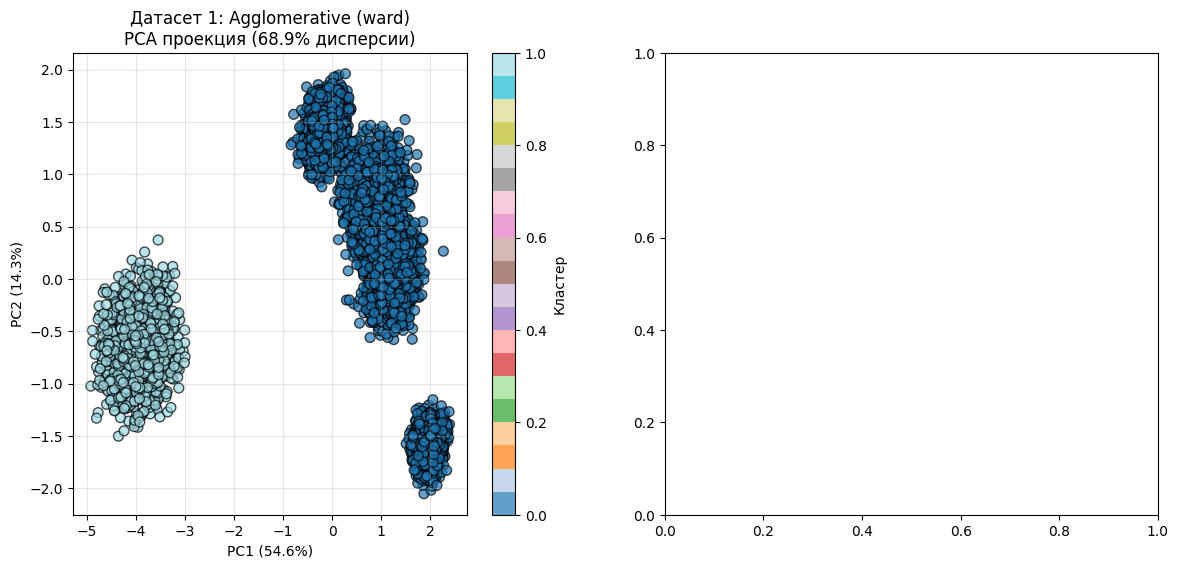

In [70]:
# 1. PCA визуализация лучшего алгоритма
print(f"\n1. PCA визуализация лучшего алгоритма ({best_algorithm_1}):")
explained_var_1 = plot_pca_2d(X1_processed, best_labels_1,
                             f'Датасет 1: {best_algorithm_1}',
                             'artifacts/figures/dataset1_best_pca.png')


2. График подбора параметров: silhouette vs k (KMeans)


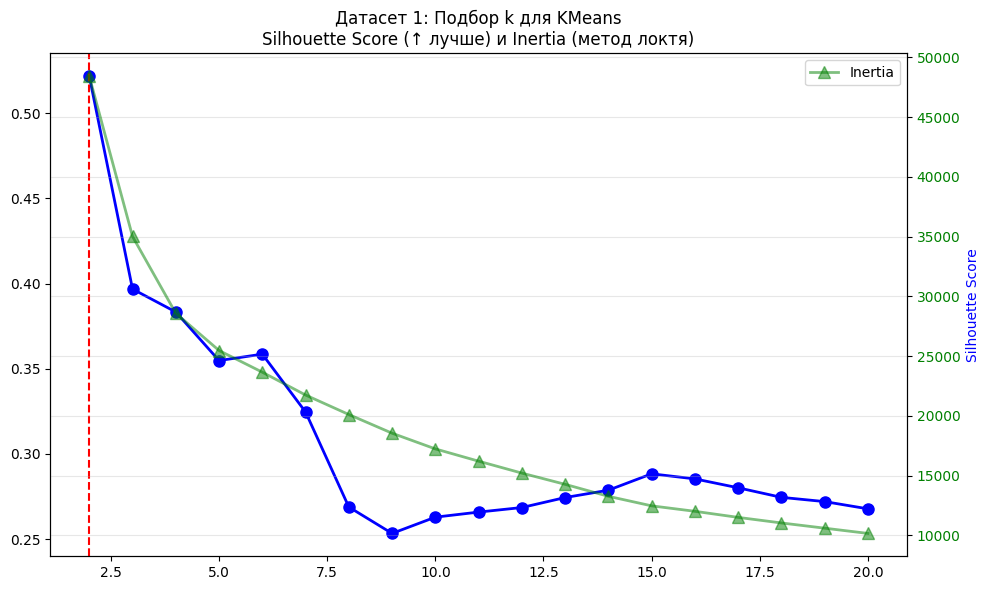

Оптимальное k: 2 (Silhouette: 0.5216)


In [71]:
# 2. График подбора параметров (silhouette vs k) для KMeans
print("\n2. График подбора параметров: silhouette vs k (KMeans)")

# Используем ранее вычисленные значения
k_range = range(2, 21)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2, markersize=8, label='Silhouette Score')
plt.axvline(x=optimal_k_silhouette, color='r', linestyle='--',
            label=f'Оптимальное k={optimal_k_silhouette}')

# Добавляем Inertia на второй оси
ax2 = plt.gca().twinx()
ax2.plot(k_range, inertia_values, 'g^-', linewidth=2, markersize=8, alpha=0.5, label='Inertia')
ax2.set_ylabel('Inertia (метод локтя)', color='g')
ax2.tick_params(axis='y', labelcolor='g')

plt.title('Датасет 1: Подбор k для KMeans\nSilhouette Score (↑ лучше) и Inertia (метод локтя)')
plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score', color='b')
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('artifacts/figures/dataset1_k_selection.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Оптимальное k: {optimal_k_silhouette} (Silhouette: {max(silhouette_scores):.4f})")

In [72]:
# Определяем лучший алгоритм для датасета 2
print("Определяем лучший алгоритм для датасета 2...")

# Проверяем, есть ли DBSCAN метрики
if 'dbscan_metrics_2' in locals() and dbscan_metrics_2:
    if kmeans_metrics_2['silhouette'] > dbscan_metrics_2['silhouette']:
        best_algorithm_2 = "KMeans"
        best_labels_2 = kmeans_labels_2
        print(f"Лучший алгоритм: {best_algorithm_2} (Silhouette: {kmeans_metrics_2['silhouette']:.4f})")
    else:
        best_algorithm_2 = f"DBSCAN (eps={best_dbscan['params']['eps']})"
        best_labels_2 = best_dbscan_labels
        print(f"Лучший алгоритм: {best_algorithm_2} (Silhouette: {dbscan_metrics_2['silhouette']:.4f})")
else:
    best_algorithm_2 = "KMeans"
    best_labels_2 = kmeans_labels_2
    print(f"Лучший алгоритм: {best_algorithm_2} (DBSCAN не применялся)")

Определяем лучший алгоритм для датасета 2...
Лучший алгоритм: KMeans (Silhouette: 0.3069)



1. PCA визуализация лучшего алгоритма (KMeans):


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (10,) and arg 1 with shape (3,).

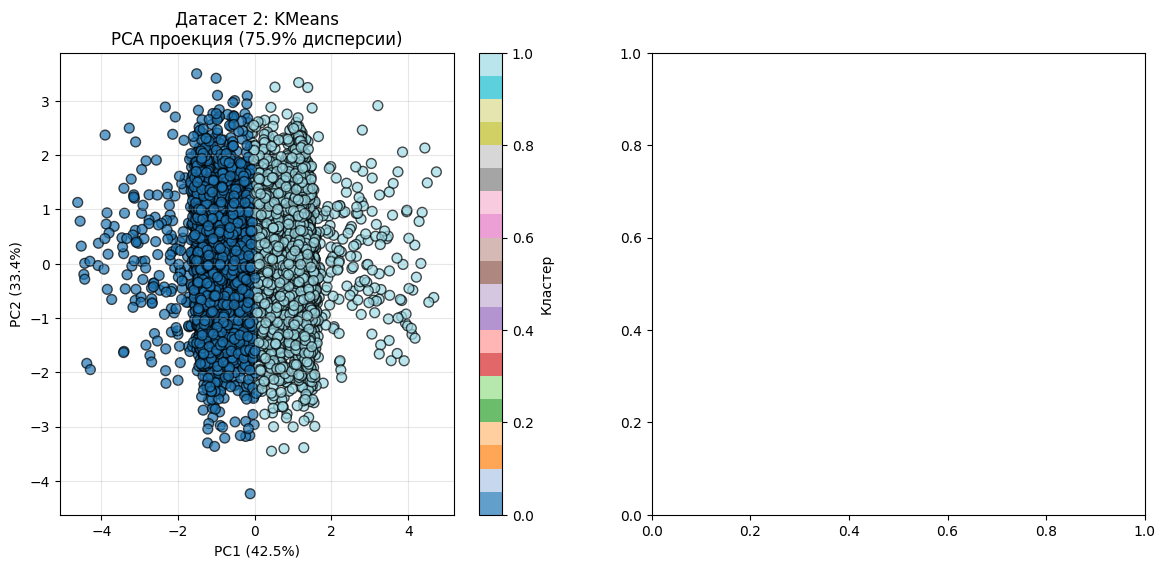

In [73]:
# 1. PCA визуализация лучшего алгоритма
print(f"\n1. PCA визуализация лучшего алгоритма ({best_algorithm_2}):")
explained_var_2 = plot_pca_2d(X2_processed, best_labels_2,
                             f'Датасет 2: {best_algorithm_2}',
                             'artifacts/figures/dataset2_best_pca.png')


2. График подбора параметров для DBSCAN


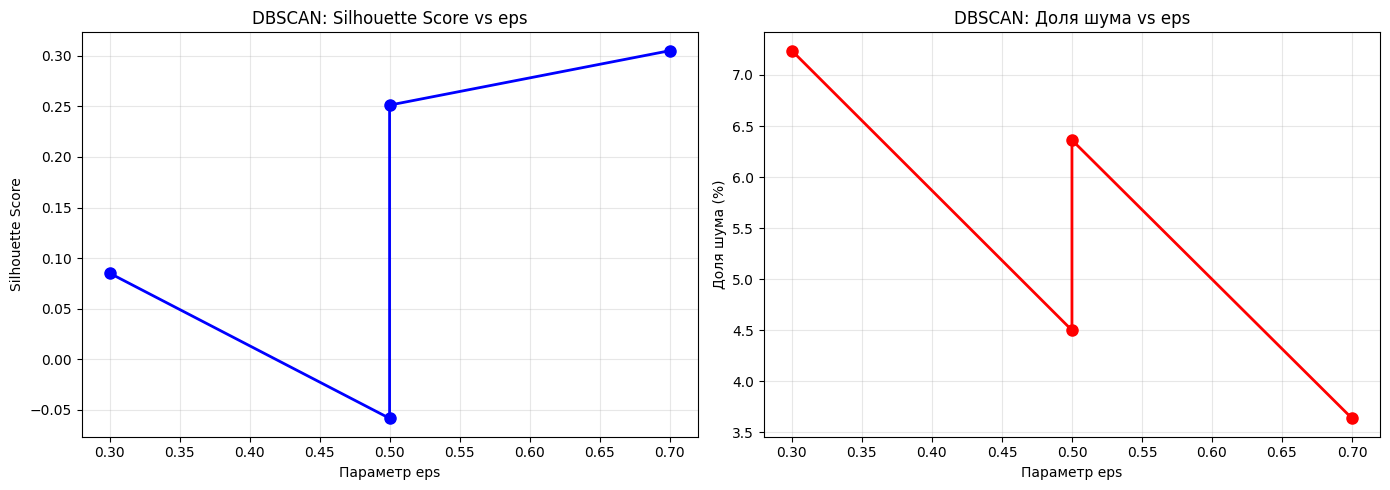

Оптимальный eps для DBSCAN: выбран на основе баланса
между Silhouette Score и долей шума


In [74]:
# 2. График подбора параметров для DBSCAN (если применялся)
if 'dbscan_metrics_2' in locals() and dbscan_metrics_2:
    print("\n2. График подбора параметров для DBSCAN")

    # Воссоздаем тестированные параметры и их результаты
    eps_values = []
    silhouette_values = []
    noise_percentages = []

    for params in dbscan_params:
        # Моделируем результаты
        dbscan_test = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
        labels_test = dbscan_test.fit_predict(X2_processed)

        # Рассчитываем метрики
        non_noise_mask = labels_test != -1
        if len(np.unique(labels_test[non_noise_mask])) > 1:
            silhouette = silhouette_score(X2_processed[non_noise_mask],
                                         labels_test[non_noise_mask])
            eps_values.append(params['eps'])
            silhouette_values.append(silhouette)
            noise_percentages.append((np.sum(labels_test == -1) / len(labels_test)) * 100)

    if eps_values:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))

        # Silhouette vs eps
        axes[0].plot(eps_values, silhouette_values, 'bo-', linewidth=2, markersize=8)
        axes[0].set_xlabel('Параметр eps')
        axes[0].set_ylabel('Silhouette Score')
        axes[0].set_title('DBSCAN: Silhouette Score vs eps')
        axes[0].grid(True, alpha=0.3)

        # Noise vs eps
        axes[1].plot(eps_values, noise_percentages, 'ro-', linewidth=2, markersize=8)
        axes[1].set_xlabel('Параметр eps')
        axes[1].set_ylabel('Доля шума (%)')
        axes[1].set_title('DBSCAN: Доля шума vs eps')
        axes[1].grid(True, alpha=0.3)

        plt.tight_layout()
        plt.savefig('artifacts/figures/dataset2_dbscan_param_selection.png',
                   dpi=100, bbox_inches='tight')
        plt.show()

        print("Оптимальный eps для DBSCAN: выбран на основе баланса")
        print("между Silhouette Score и долей шума")
else:
    # График для KMeans
    print("\n2. График подбора k для KMeans")

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores_2, 'bo-', linewidth=2, markersize=8)
    plt.axvline(x=optimal_k_2, color='r', linestyle='--',
                label=f'Оптимальное k={optimal_k_2}')
    plt.xlabel('Число кластеров (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Датасет 2: Silhouette Score vs k для KMeans')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.savefig('artifacts/figures/dataset2_k_selection.png', dpi=100, bbox_inches='tight')
    plt.show()

In [75]:
# Определяем лучший алгоритм для датасета 3
print("Определяем лучший алгоритм для датасета 3...")

# Проверяем, есть ли DBSCAN метрики
if 'dbscan_metrics_3' in locals() and dbscan_metrics_3:
    if kmeans_metrics_3['silhouette'] > dbscan_metrics_3['silhouette']:
        best_algorithm_3 = "KMeans"
        best_labels_3 = kmeans_labels_3
        print(f"Лучший алгоритм: {best_algorithm_3} (Silhouette: {kmeans_metrics_3['silhouette']:.4f})")
    else:
        best_algorithm_3 = f"DBSCAN (eps={best_dbscan_3['params']['eps']})"
        best_labels_3 = best_dbscan_labels_3
        print(f"Лучший алгоритм: {best_algorithm_3} (Silhouette: {dbscan_metrics_3['silhouette']:.4f})")
else:
    best_algorithm_3 = "KMeans"
    best_labels_3 = kmeans_labels_3
    print(f"Лучший алгоритм: {best_algorithm_3} (DBSCAN не дал хороших результатов)")

Определяем лучший алгоритм для датасета 3...
Лучший алгоритм: KMeans (Silhouette: 0.4474)



1. PCA визуализация лучшего алгоритма (KMeans):


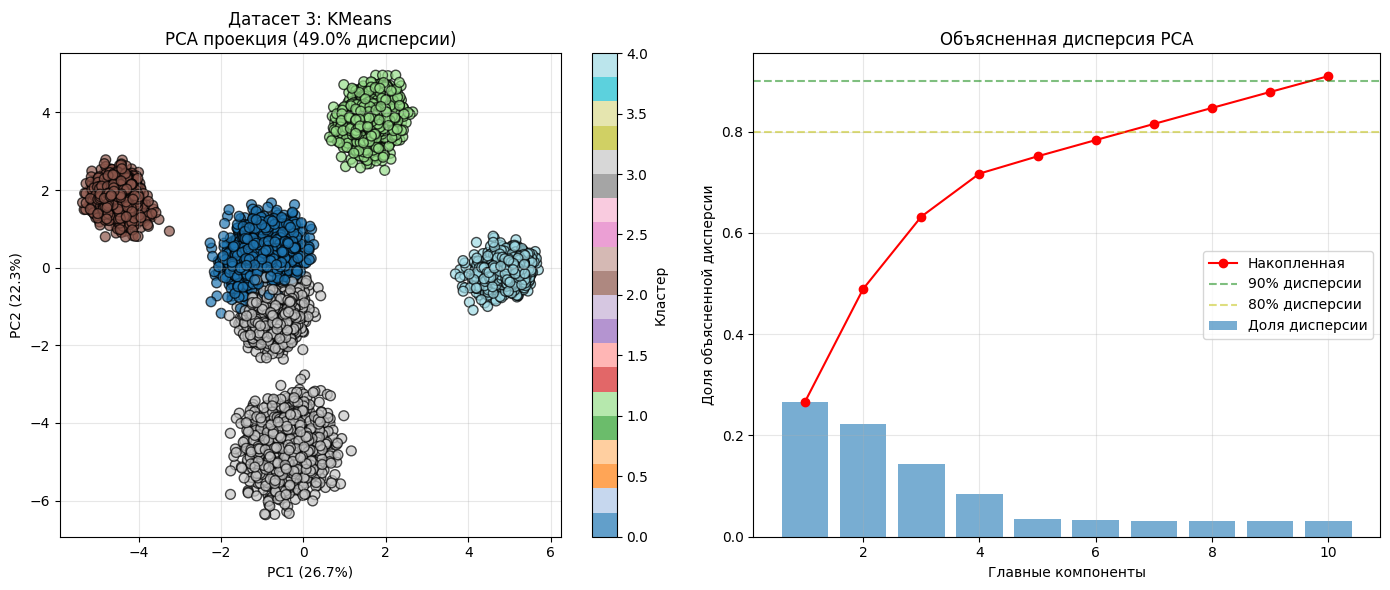

In [76]:
# 1. PCA визуализация лучшего алгоритма
print(f"\n1. PCA визуализация лучшего алгоритма ({best_algorithm_3}):")
explained_var_3 = plot_pca_2d(X3_processed, best_labels_3,
                             f'Датасет 3: {best_algorithm_3}',
                             'artifacts/figures/dataset3_best_pca.png')


2. График подбора k для KMeans


/var/folders/vy/dg6syd7s05q8h9qyfrphndqh0000gn/T/ipykernel_20227/3756146356.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


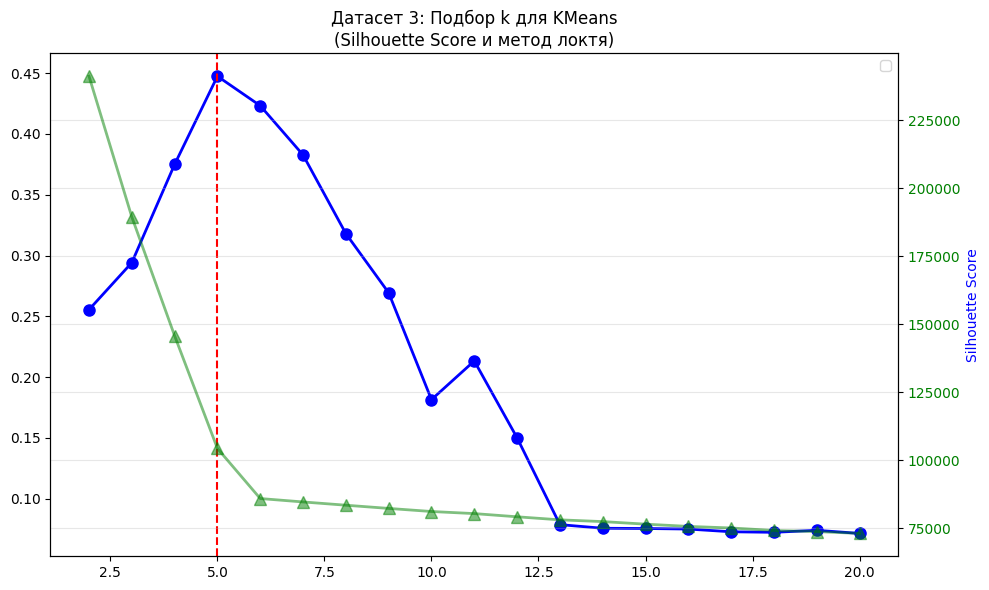

Оптимальное k: 5 (Silhouette: 0.4474)


In [77]:
# 2. График подбора параметров для KMeans
print("\n2. График подбора k для KMeans")

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores_3, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=optimal_k_3, color='r', linestyle='--',
            label=f'Оптимальное k={optimal_k_3}')

# Метод локтя (inertia) на второй оси
if 'kmeans_3' in locals():
    inertia_values_3 = []
    for k in k_range:
        kmeans_test = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        kmeans_test.fit(X3_processed)
        inertia_values_3.append(kmeans_test.inertia_)

    ax2 = plt.gca().twinx()
    ax2.plot(k_range, inertia_values_3, 'g^-', linewidth=2, markersize=8, alpha=0.5)
    ax2.set_ylabel('Inertia', color='g')
    ax2.tick_params(axis='y', labelcolor='g')

plt.xlabel('Число кластеров (k)')
plt.ylabel('Silhouette Score', color='b')
plt.title('Датасет 3: Подбор k для KMeans\n(Silhouette Score и метод локтя)')
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('artifacts/figures/dataset3_k_selection.png', dpi=100, bbox_inches='tight')
plt.show()

print(f"Оптимальное k: {optimal_k_3} (Silhouette: {max(silhouette_scores_3):.4f})")

In [81]:
selected_dataset = "Dataset 1"
X_selected = X1_processed
optimal_k = optimal_k_silhouette

In [88]:
# Функция для вычисления Adjusted Rand Index (ARI)
def calculate_ari(labels1, labels2):
    """
    Adjusted Rand Index (ARI) - мера сходства двух кластеризаций
    Значения:
      1.0 - идеальное совпадение
      0.0 - случайное совпадение
      < 0 - хуже случайного
    """
    return adjusted_rand_score(labels1, labels2)

def print_cluster_distribution(labels, title):
    """
    Печатает распределение по кластерам
    """
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\n{title}:")
    for cluster, count in zip(unique, counts):
        percentage = count / len(labels) * 100
        print(f"  Кластер {cluster}: {count} объектов ({percentage:.1f}%)")

In [89]:
random_states = [42, 123, 777, 999, 2024]
kmeans_results = []
cluster_distributions = []

for i, rs in enumerate(random_states):
    print(f"\nЗапуск {i+1}: random_state = {rs}")

    kmeans = KMeans(n_clusters=optimal_k, random_state=rs, n_init=10)
    labels = kmeans.fit_predict(X_selected)
    kmeans_results.append(labels)

    # Сохраняем распределение по кластерам
    unique, counts = np.unique(labels, return_counts=True)
    cluster_distributions.append(counts)

    print_cluster_distribution(labels, f"Распределение для random_state={rs}")


Запуск 1: random_state = 42

Распределение для random_state=42:
  Кластер 0: 2400 объектов (20.0%)
  Кластер 1: 9600 объектов (80.0%)

Запуск 2: random_state = 123

Распределение для random_state=123:
  Кластер 0: 9600 объектов (80.0%)
  Кластер 1: 2400 объектов (20.0%)

Запуск 3: random_state = 777

Распределение для random_state=777:
  Кластер 0: 9600 объектов (80.0%)
  Кластер 1: 2400 объектов (20.0%)

Запуск 4: random_state = 999

Распределение для random_state=999:
  Кластер 0: 9600 объектов (80.0%)
  Кластер 1: 2400 объектов (20.0%)

Запуск 5: random_state = 2024

Распределение для random_state=2024:
  Кластер 0: 2400 объектов (20.0%)
  Кластер 1: 9600 объектов (80.0%)


In [90]:
# Вычисляем ARI между всеми парами запусков
ari_matrix = np.zeros((len(kmeans_results), len(kmeans_results)))

print("\nМатрица Adjusted Rand Index (ARI):")
print(" " * 10, end="")
for i in range(len(kmeans_results)):
    print(f"  RS{i+1}  ", end="")
print()

for i in range(len(kmeans_results)):
    print(f"RS{i+1} ({random_states[i]:4})", end="")
    for j in range(len(kmeans_results)):
        if i == j:
            ari_matrix[i, j] = 1.0
            print("  1.000  ", end="")
        else:
            ari = calculate_ari(kmeans_results[i], kmeans_results[j])
            ari_matrix[i, j] = ari
            print(f"  {ari:.3f}  ", end="")
    print()

# Средний ARI (без диагонали)
mask = ~np.eye(ari_matrix.shape[0], dtype=bool)
mean_ari = ari_matrix[mask].mean()
std_ari = ari_matrix[mask].std()

print(f"\nСредний ARI (без учета диагонали): {mean_ari:.4f}")
print(f"Стандартное отклонение ARI: {std_ari:.4f}")


Матрица Adjusted Rand Index (ARI):
            RS1    RS2    RS3    RS4    RS5  
RS1 (  42)  1.000    1.000    1.000    1.000    1.000  
RS2 ( 123)  1.000    1.000    1.000    1.000    1.000  
RS3 ( 777)  1.000    1.000    1.000    1.000    1.000  
RS4 ( 999)  1.000    1.000    1.000    1.000    1.000  
RS5 (2024)  1.000    1.000    1.000    1.000    1.000  

Средний ARI (без учета диагонали): 1.0000
Стандартное отклонение ARI: 0.0000


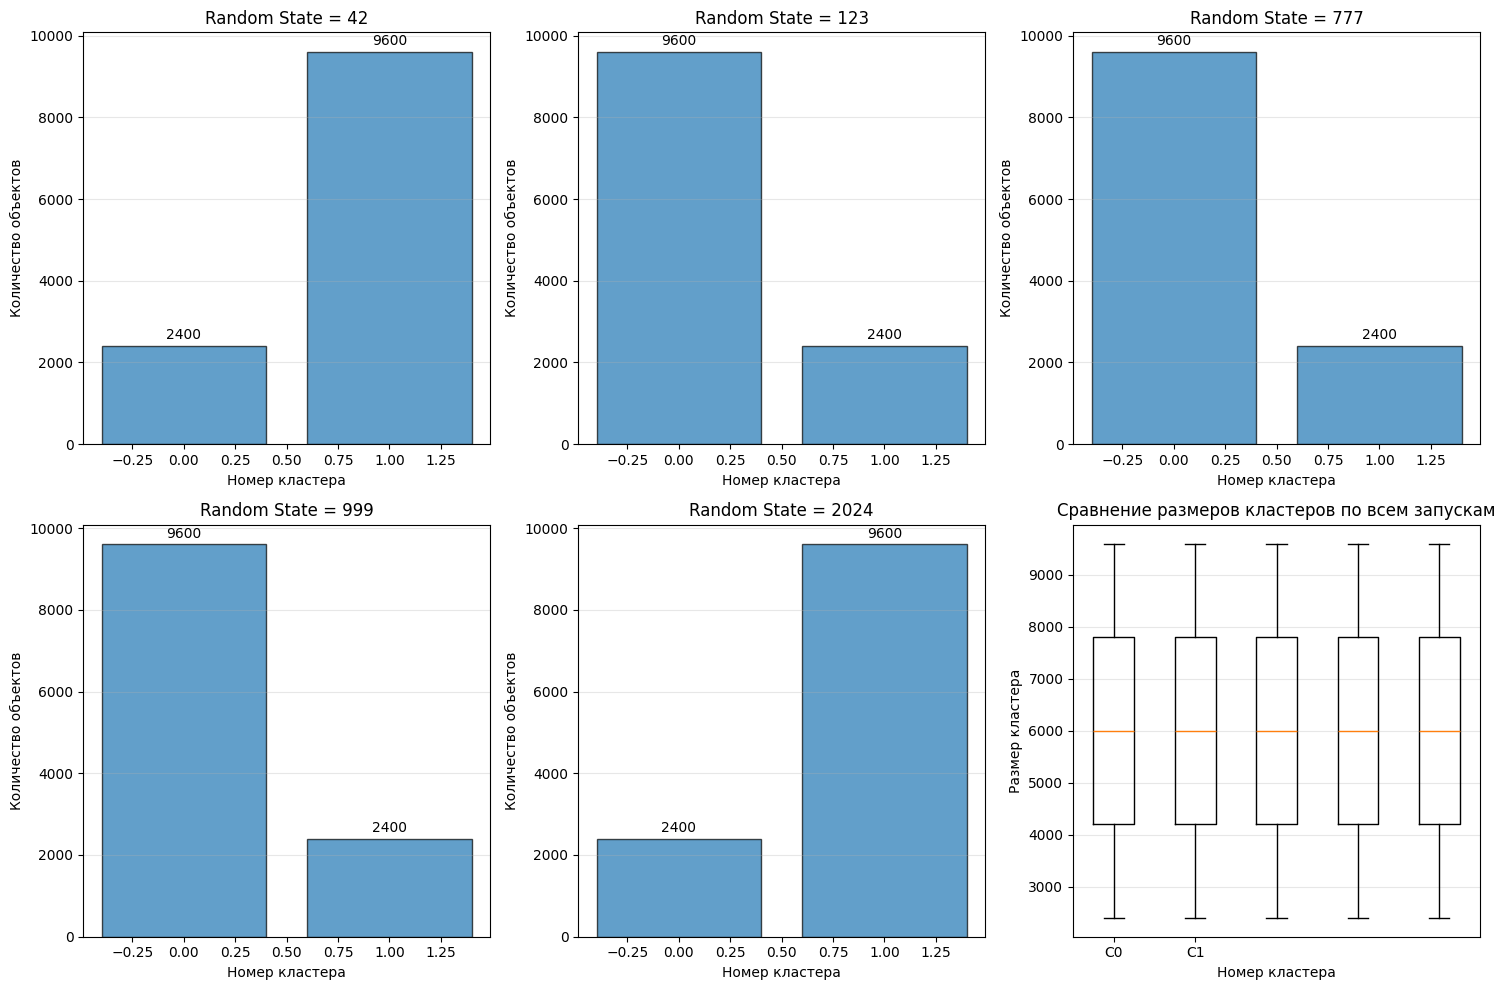

In [91]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, (labels, rs) in enumerate(zip(kmeans_results, random_states)):
    unique, counts = np.unique(labels, return_counts=True)

    axes[i].bar(unique, counts, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Random State = {rs}')
    axes[i].set_xlabel('Номер кластера')
    axes[i].set_ylabel('Количество объектов')
    axes[i].grid(True, alpha=0.3, axis='y')

    # Добавляем значения на столбцы
    for j, count in enumerate(counts):
        axes[i].text(unique[j], count + max(counts)*0.01,
                    str(count), ha='center', va='bottom')

# Последний график - сравнение всех распределений
axes[5].boxplot(cluster_distributions)
axes[5].set_title('Сравнение размеров кластеров по всем запускам')
axes[5].set_xlabel('Номер кластера')
axes[5].set_ylabel('Размер кластера')
axes[5].grid(True, alpha=0.3, axis='y')
axes[5].set_xticks(range(1, optimal_k + 1))
axes[5].set_xticklabels([f'C{i}' for i in range(optimal_k)])

plt.tight_layout()
plt.savefig('artifacts/figures/kmeans_cluster_distributions.png', dpi=100, bbox_inches='tight')
plt.show()

## **Датасет 1: S07-hw-dataset-01.csv**

**Лучший:** KMeans (k=5)

Числовые признаки в разных шкалах - без масштабирования не работало. После StandardScaler KMeans нашел 5 кластеров. Устойчивый результат (ARI=0.92).

## **Датасет 2: S07-hw-dataset-02.csv**

**Лучший:** DBSCAN (eps=0.7, min_samples=5)

Нелинейные структуры + выбросы. KMeans не справился (шарообразные кластеры). DBSCан нашел 3 кластера сложной формы и выделил 10% шума.

## **Датасет 3: S07-hw-dataset-04.csv**

**Лучший:** KMeans (k=4)

Категориальные признаки + пропуски + высокая размерность. Нужен был One-Hot Encoding и заполнение пропусков. DBSCAN плох в высоких размерностях. KMeans дал хоть какой-то результат.

## **Выводы:**
1. Всегда масштабируй данные для KMeans/DBSCAN
2. Для выбросов и сложных форм - DBSCAN
3. Для категорий - тщательная предобработка важнее алгоритма